In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint

# Stats NZ contact matrix

In [3]:
'''Data from stats NZ on memebers of house hold first column is age group 0-10, each column increases age by 10 years 
until 9th column which is number of houses with the specific distribution of age casses, and final column is number of 
individuals in the households of the specific distribution'''
#Take data from StatsNZ excel sheet based on 2018 Census of Population and Dwellings and turn it into a matrix to run calculations on

A = np.zeros((10)).astype(int)

f = open("Table_1_rounded.csv", "r", encoding='utf-8')
lines = f.readlines()
print(lines[-1])
for line in lines[1:-1]:
    line = line.split(",")
    line = [word.strip('"') for word in line]
    for i in range(0, len(line)):
        line[i] = int(line[i])
    A = np.vstack([A, line])
    
A = A[1:]
f.close()
print(sum(A[:, 8]))
print(sum(A[:,9]))
print(A.shape)

lists = []
(a,b) = A.shape
for i in range(0,a):
    if A[i,9]==A[i,8]:
        lists.append(i)
B = np.delete(A, lists,axis=0)

print(sum(B[:, 8]))
empiracal_tot = sum(B[:,9])
print(empiracal_tot)
(rows,cols) = B.shape

"Total","Total","Total","Total","Total","Total","Total","Total",1593804,4300107

1580445
4187691
(2908, 10)
1218963
3826209


### Comparing Stats NZ census age group sizes to mine

In [4]:
lists = []
print(A[0,:])
print(A[1,:])
print(A[2,:])
for i in range(0,1):
    lists.append(A[i,0]+A[i,1]+A[i,2]+A[i,3]+A[i,4]+A[i,5]+A[i,6]+A[i,7])
print(sum(lists)/len(lists))

[     0      0      0      0      0      0      0      1 130077 130077]
[     0      0      0      0      0      0      0      2  86316 172632]
[   0    0    0    0    0    0    0    3 1002 3006]
1.0


In [5]:
age_statsNZ = []
age_0_10 = 151269+165780 + 143652 + 156852 
age_10_20 = 156405 + 154209 + 149442 + 147615
age_20_30 = 163731 + 173706 + 153672 + 170760
age_30_40 = 155532 + 144657 + 161502 + 150738
age_40_50 = 140997 + 155388 + 150348 + 166095
age_50_60 = 150456 + 147408 + 158133 + 155340
age_60_70 = 127092 + 112089 + 133809 + 116943
age_above_70 = 88935 + 62106 + 38043 + 21936 + 8121 + 1587 + 111 + 94698 + 70686 + 47319 + 32043 + 15693 + 4326 + 537
age_statsNZ = [age_0_10,age_10_20,age_20_30,age_30_40,age_40_50,age_50_60,age_60_70,age_above_70]
census_tot = age_0_10 + age_10_20 + age_20_30+age_30_40+age_40_50+age_50_60+age_60_70+age_above_70
print(census_tot)
print(age_statsNZ)

4699761
[617553, 607671, 661869, 612429, 612828, 611337, 489933, 486141]


In [6]:
(rows,cols) = A.shape
lists = []
empiracal_tot = []
k = 0
while k < 8:
    for i in range(0, rows):
        lists.append(A[i,8]*A[i,k])
    print(f'There is {sum(lists)} people between {10*k}-{10*(k+1)}')
    empiracal_tot.append(sum(lists))
    k+= 1
    lists=  []
print(f'There is a total of {sum(empiracal_tot)} people in the data set')
print(empiracal_tot)

There is 545802 people between 0-10
There is 547290 people between 10-20
There is 555225 people between 20-30
There is 536559 people between 30-40
There is 555534 people between 40-50
There is 562881 people between 50-60
There is 455655 people between 60-70
There is 428745 people between 70-80
There is a total of 4187691 people in the data set
[545802, 547290, 555225, 536559, 555534, 562881, 455655, 428745]


In [7]:
#Include people living by themselves

print(empiracal_tot)
print(age_statsNZ)

ration = sum(empiracal_tot) / census_tot
print(ration)
#print(ration * age_statsNZ)
ration_census = []
ratio_list = []
for num in range(0,len(empiracal_tot)):
    ration_census.append(ration*age_statsNZ[num])
    ratio_list.append(float(empiracal_tot[num])/ (age_statsNZ[num]))
    #age_statsNZ[num] = ration*age_statsNZ[num]
    
#print(ration_census)
print(f'Ratio between census data and data I used for each age group is: {ratio_list}')

[545802, 547290, 555225, 536559, 555534, 562881, 455655, 428745]
[617553, 607671, 661869, 612429, 612828, 611337, 489933, 486141]
0.8910433956109683
Ratio between census data and data I used for each age group is: [0.883814020820885, 0.9006353767087782, 0.8388744600517625, 0.8761162518430707, 0.9065088409798507, 0.9207376618788, 0.9300353313616352, 0.8819354878522898]


# Household contact matrix by number of contacts/ population of age group

[512160, 239172, 200055, 520926, 304530, 66936, 42654, 14223]
[239172, 506604, 140895, 175104, 490392, 244833, 45111, 24879]
[200055, 140895, 609396, 136197, 104394, 210765, 67326, 19431]
[520926, 175104, 136197, 344616, 88419, 52008, 69534, 17112]
[304530, 490392, 104394, 88419, 289974, 91176, 35478, 37245]
[66936, 244833, 210765, 52008, 91176, 279036, 79035, 37458]
[42654, 45111, 67326, 69534, 35478, 79035, 217860, 60345]
[14223, 24879, 19431, 17112, 37245, 37458, 60345, 209292]
[[0.03317356 0.0580275  0.04532065 0.03991184 0.08686982 0.08736662
  0.140748   0.4881503 ]
 [0.0936103  0.09900253 0.14775653 0.1526023  0.07786154 0.1734536
  0.4781249  0.13243572]
 [0.11891679 0.43496405 0.37443971 0.09239608 0.16198095 0.49572823
  0.14041156 0.06654693]
 [0.54817527 0.88273985 0.18791649 0.15916038 0.52197345 0.16412317
  0.06386288 0.0670436 ]
 [0.97086434 0.32634622 0.25383415 0.64227047 0.16478896 0.09692876
  0.12959246 0.03189211]
 [0.36031339 0.25376199 1.09756585 0.24530055 0.18

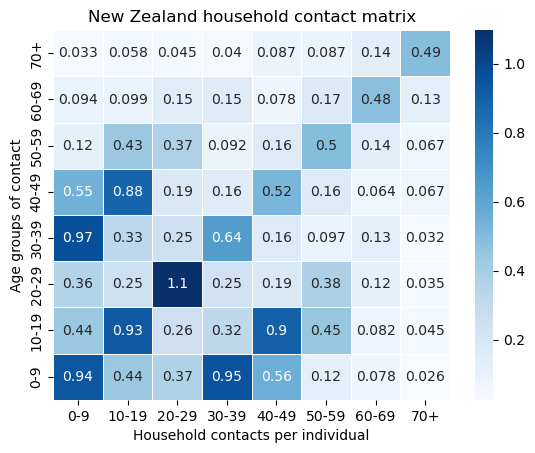

In [8]:
population_per_group = []
lists = []
total_contacts = []
summed = 0
(rows,cols) = B.shape
household_matrix = np.zeros((cols-2)).astype(float)
#print(household_matrix)

k = 0
while k < 8:
    for i in range(0, rows):
        if B[i, k] != 0:
            lists.append(i)
            
    for j in range(0, cols-2):
        for z in range(0, len(lists)):
            if j==k:
                summed = summed + ((B[lists[z],k]-1)*B[lists[z],j] * B[lists[z], 8])
            else:
                summed = summed + (B[lists[z],k]*B[lists[z],j] * B[lists[z], 8])
        population_per_group.append(summed)
        summed = 0
    #print(population_per_group)
    household_matrix = np.vstack([household_matrix, population_per_group/ empiracal_tot[k]])
    #print(population_per_group/ population_group[k])
    k +=1
    lists = []
    print(population_per_group)
    population_per_group = []
    
household_matrix = np.flipud(household_matrix[1:])
print(household_matrix)
    
#Produce heatmap
fig, ax = plt.subplots()
sns.heatmap(household_matrix, cmap='Blues',annot=True, linewidth=0.5, cbar=True, 
            xticklabels = ('0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70+'), 
            yticklabels = ('70+','60-69','50-59','40-49','30-39','20-29', '10-19', '0-9'))
plt.title('New Zealand household contact matrix')
plt.xlabel('Household contacts per individual')
plt.ylabel('Age groups of contact')
plt.xticks()
plt.show()

# Variance of the matrix

In [9]:
population_per_group = []
lists = []
total_contacts = []
summed = 0
(rows,cols) = B.shape
expectation_matrix = np.zeros((cols-2)).astype(float)
#print(household_matrix)

k = 0
while k < 8:
    for i in range(0, rows):
        if B[i, k] != 0:
            lists.append(i)
            
    for j in range(0, cols-2):
        for z in range(0, len(lists)):
            if j==k:
                summed = summed + ((B[lists[z],k]-1)*(B[lists[z],j])**2 * B[lists[z], 8])
            else:
                summed = summed + (B[lists[z],k]*(B[lists[z],j])**2 * B[lists[z], 8])
        population_per_group.append(summed)
        summed = 0
    #print(population_per_group)
    expectation_matrix = np.vstack([expectation_matrix, population_per_group/ empiracal_tot[k]])
    #print(population_per_group/ population_group[k])
    k +=1
    lists = []
    print(population_per_group)
    population_per_group = []
    
expectation_matrix = np.flipud(expectation_matrix[1:])
print(expectation_matrix)

[1397082, 436596, 344313, 899820, 484506, 88830, 62472, 18375]
[423696, 1445064, 243537, 268488, 803862, 367125, 58779, 33351]
[392205, 238095, 2126172, 196917, 151188, 337329, 93354, 25125]
[1066146, 321228, 237909, 766200, 98067, 71742, 106404, 21894]
[546954, 994512, 165264, 102651, 594564, 96468, 46758, 52563]
[112428, 440865, 357573, 71808, 96240, 570456, 82971, 48420]
[74916, 71745, 104250, 105120, 44928, 83301, 444450, 63663]
[22983, 40731, 28191, 22902, 51111, 49272, 64911, 428520]
[[0.05360529 0.09500052 0.06575237 0.05341637 0.11921072 0.11492146
  0.15139768 0.99947521]
 [0.16441387 0.15745465 0.22879152 0.23070086 0.09860092 0.18281595
  0.97540903 0.13971755]
 [0.19973671 0.78322949 0.63525505 0.12757226 0.17097752 1.01345755
  0.14740416 0.08602173]
 [0.9845554  1.79019106 0.29748674 0.18477897 1.07025673 0.17364914
  0.08416767 0.09461707]
 [1.98700609 0.5986816  0.44339765 1.42798835 0.18277021 0.13370757
  0.19830811 0.04080446]
 [0.7063893  0.42882615 3.82938809 0.354

In [10]:
population_per_group = []
lists = []
total_contacts = []
summed = 0
(rows,cols) = B.shape
expectation2_matrix = np.zeros((cols-2)).astype(float)
#print(household_matrix)

k = 0
while k < 8:
    for i in range(0, rows):
        if B[i, k] != 0:
            lists.append(i)
            
    for j in range(0, cols-2):
        for z in range(0, len(lists)):
            if j==k:
                summed = summed + ((B[lists[z],k]-1)*(B[lists[z],j])**3 * B[lists[z], 8])
            else:
                summed = summed + (B[lists[z],k]*(B[lists[z],j])**3 * B[lists[z], 8])
        population_per_group.append(summed)
        summed = 0
    #print(population_per_group)
    expectation2_matrix = np.vstack([expectation2_matrix, population_per_group/ empiracal_tot[k]])
    #print(population_per_group/ population_group[k])
    k +=1
    lists = []
    print(population_per_group)
    population_per_group = []
    
expectation2_matrix = np.flipud(expectation2_matrix[1:])
print(expectation2_matrix)

[4172442, 1010364, 711579, 1708080, 850650, 133068, 103260, 26679]
[942990, 4622304, 560367, 465120, 1442196, 615579, 86403, 50403]
[943905, 513891, 8796444, 351135, 247242, 594813, 145986, 36585]
[2569686, 729666, 573489, 1810608, 120513, 111840, 182196, 31512]
[1164714, 2398734, 325200, 138873, 1235496, 107592, 69696, 83505]
[230034, 960963, 749793, 115458, 107034, 1179648, 91293, 70722]
[154704, 139125, 198456, 184374, 64368, 92391, 916602, 70623]
[43797, 79887, 49419, 34968, 79797, 73872, 74583, 890232]
[[ 0.10215163  0.18632754  0.11526432  0.08155897  0.18611762  0.17229822
   0.17395655  2.07636707]
 [ 0.33952003  0.30532969  0.43554005  0.40463509  0.14126477  0.20276525
   2.01161405  0.15499226]
 [ 0.40867253  1.70722231  1.33206308  0.20511973  0.19015387  2.09573249
   0.16218881  0.1256429 ]
 [ 2.09656655  4.31788873  0.58538271  0.2499811   2.22397909  0.19367311
   0.12545767  0.15031483]
 [ 4.7891956   1.35989891  1.06882747  3.37448072  0.22460345  0.20843933
   0.3395

[[0.0992781  0.17730244 0.11094094 0.07870566 0.17190643 0.15909128
  0.15103529 1.07741637]
 [0.31248811 0.28053772 0.38319449 0.3514122  0.13154263 0.16934358
  1.06019128 0.13547127]
 [0.36877777 1.09377387 0.9285141  0.18884505 0.16092056 1.06863628
  0.14046082 0.11824316]
 [1.12721721 1.1131047  0.49688435 0.21583783 1.07852963 0.16351909
  0.11837347 0.14136244]
 [0.8410024  1.00147925 0.872226   1.33533    0.1911985  0.19056162
  0.30023767 0.05706479]
 [1.20105468 0.74166264 1.17881269 0.50663442 0.37115304 0.70217933
  0.23466111 0.06384447]
 [1.12367644 1.47409669 0.82588056 0.60919422 0.47777211 0.67479696
  0.14633947 0.0883821 ]
 [1.09261251 1.21128848 0.90577361 0.41153918 0.77052885 0.2173147
  0.1760886  0.04774696]]


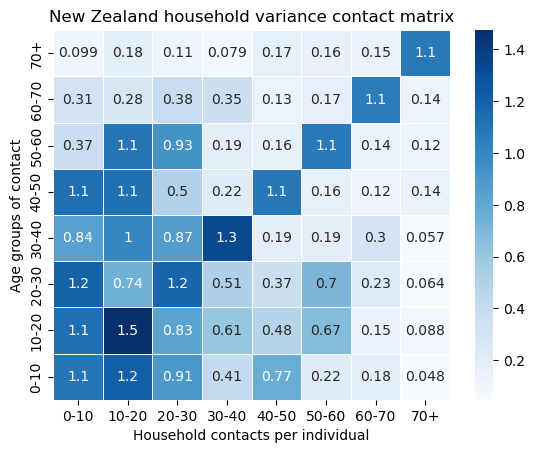

In [11]:
variance_matrix = expectation2_matrix - expectation_matrix**2
print(variance_matrix)

sns.heatmap(variance_matrix, cmap='Blues',annot=True, linewidth=0.5, cbar=True, 
            xticklabels = ('0-10','10-20','20-30','30-40','40-50','50-60', '60-70', '70+'), 
            yticklabels = ('70+','60-70','50-60','40-50','30-40','20-30', '10-20', '0-10'))
plt.title('New Zealand household variance contact matrix')
plt.xlabel('Household contacts per individual')
plt.ylabel('Age groups of contact')
plt.xticks()
plt.show()
#[::-1,::-1].T

# Making Graph
## Contacts per age group

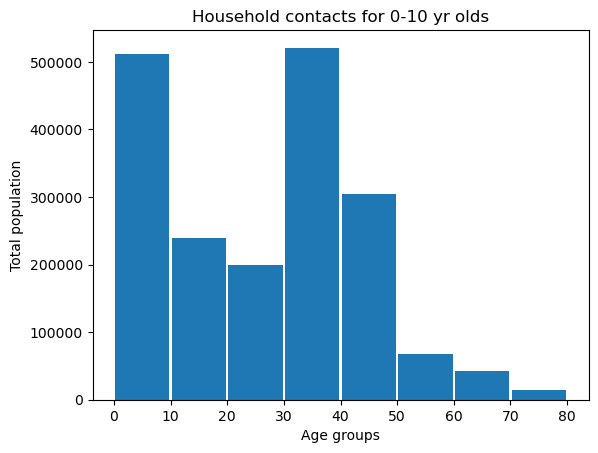

Breakdown of number of household contacts in each age group for 10-0: [512160, 239172, 200055, 520926, 304530, 66936, 42654, 14223]


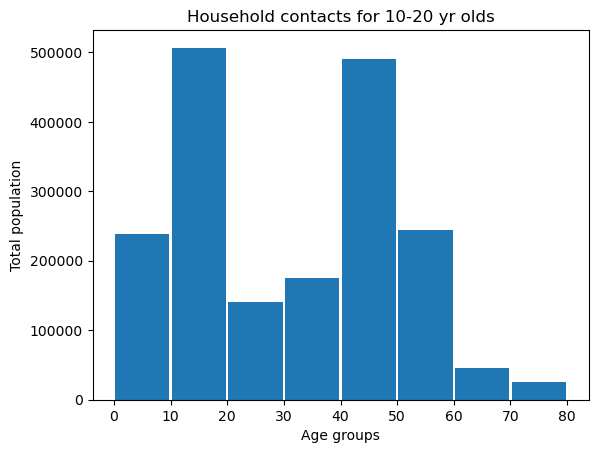

Breakdown of number of household contacts in each age group for 20-10: [239172, 506604, 140895, 175104, 490392, 244833, 45111, 24879]


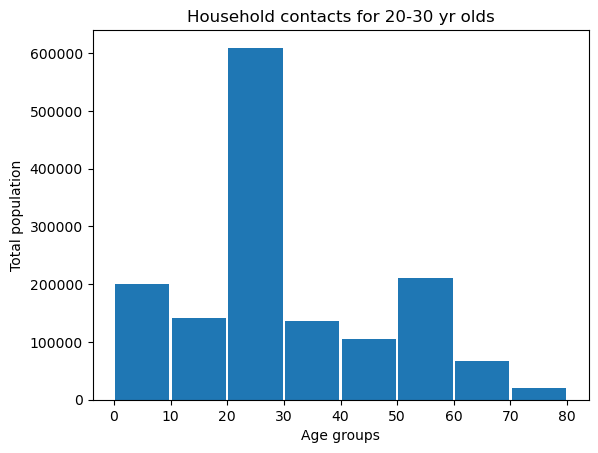

Breakdown of number of household contacts in each age group for 30-20: [200055, 140895, 609396, 136197, 104394, 210765, 67326, 19431]


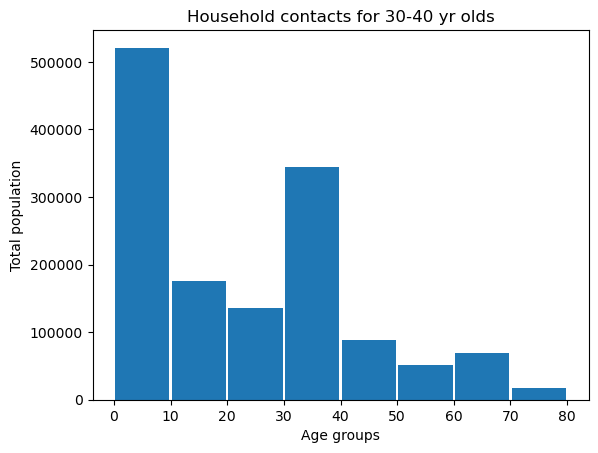

Breakdown of number of household contacts in each age group for 40-30: [520926, 175104, 136197, 344616, 88419, 52008, 69534, 17112]


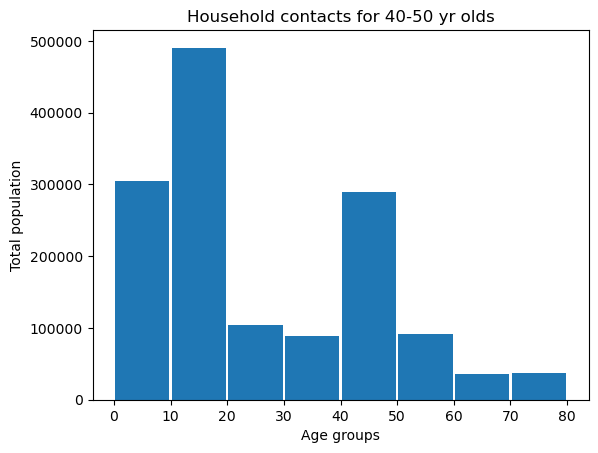

Breakdown of number of household contacts in each age group for 50-40: [304530, 490392, 104394, 88419, 289974, 91176, 35478, 37245]


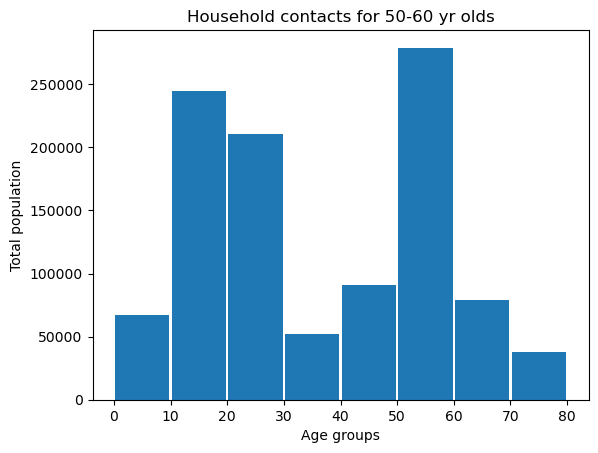

Breakdown of number of household contacts in each age group for 60-50: [66936, 244833, 210765, 52008, 91176, 279036, 79035, 37458]


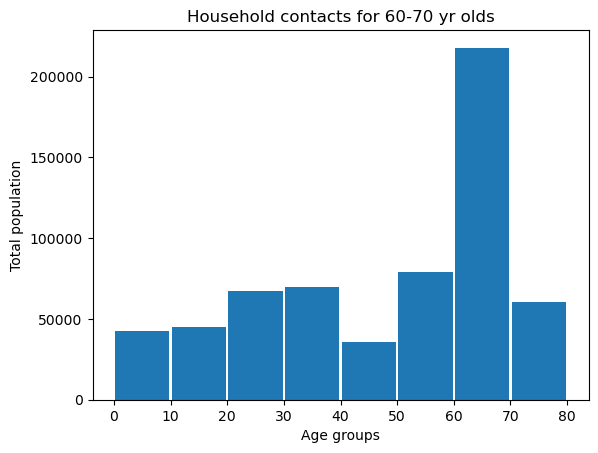

Breakdown of number of household contacts in each age group for 70-60: [42654, 45111, 67326, 69534, 35478, 79035, 217860, 60345]


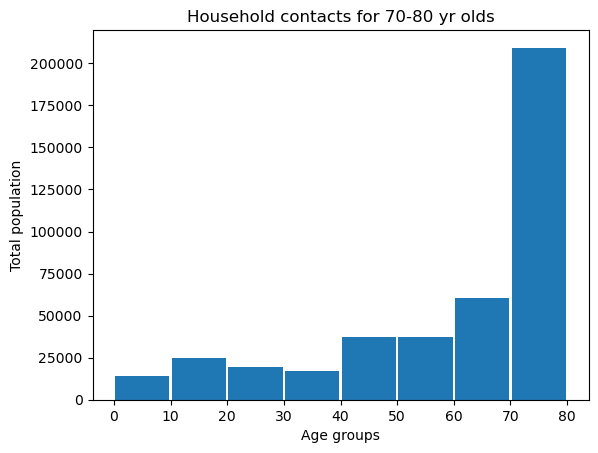

Breakdown of number of household contacts in each age group for 80-70: [14223, 24879, 19431, 17112, 37245, 37458, 60345, 209292]


In [9]:
population_per_group = []
lists = []
total_contacts = []
summed = 0
#print(B.shape)
(rows,col) = B.shape
contacts_matrix = np.zeros((col-2)).astype(float)

k = 0
while k < 8:
    for i in range(0, rows):
        if B[i, k] != 0:
            lists.append(i)
            
    for j in range(0, cols-2):
        for z in range(0, len(lists)):
            if j==k:
                summed = summed + ((B[lists[z],k]-1)*B[lists[z],j] * B[lists[z], 8])
            else:
                summed = summed + (B[lists[z],k]*B[lists[z],j] * B[lists[z], 8])
        population_per_group.append(summed)
        summed = 0
    #print(population_per_group)
    #print(population_per_group/ population_group[k])
    contacts_matrix = np.vstack([contacts_matrix, population_per_group])
    k+=1
    lists = []
    
    fig, ax = plt.subplots()
    #ax.grid(True)
    x = np.linspace(5, 75, 8)
    plt.title(f'Household contacts for {10*(k-1)}-{10*k} yr olds')
    plt.bar(x, height=population_per_group, width = 9.6)
    plt.xlabel('Age groups')
    plt.ylabel(f'Total population')
    plt.show()

    print(f'Breakdown of number of household contacts in each age group for {10*k}-{10*(k-1)}: {population_per_group}')
    total_contacts.append(sum(population_per_group))
    population_per_group = []

## Mean household contacts per age group

Total amount of contacts per age group is [1900656, 1866990, 1488459, 1403916, 1441608, 1061247, 617343, 419985]
Population size per age group: [545802, 547290, 555225, 536559, 555534, 562881, 455655, 428745]
2.4357585122684555


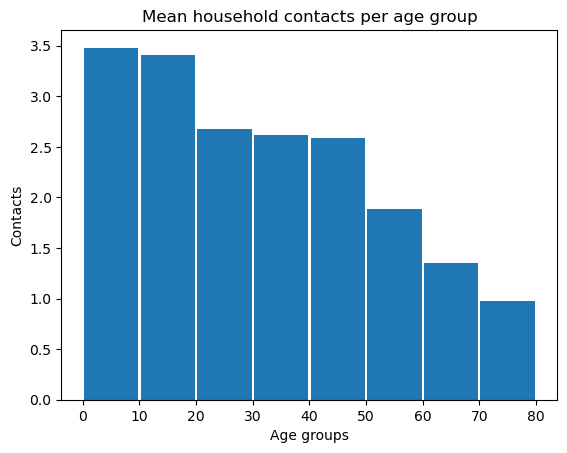

Mean number of household contacts per age group using total contacts is: [3.48, 3.41, 2.68, 2.62, 2.59, 1.89, 1.35, 0.98]
Mean number of household contacts per age group using contact matrix is: [3.48, 3.41, 2.68, 2.62, 2.59, 1.89, 1.35, 0.98]
[545802, 547290, 555225, 536559, 555534, 562881, 455655, 428745]


In [10]:
print(f'Total amount of contacts per age group is {total_contacts}')
print(f'Population size per age group: {empiracal_tot}')
print(sum(total_contacts)/sum(empiracal_tot))

#Find mean household contacts per age group via total contacts
contacts_per_age = []
for www in range(len(empiracal_tot)):
    contacts_per_age.append(round(total_contacts[www]/empiracal_tot[www],2))

fig, ax = plt.subplots()
#ax.grid(True)
x = np.linspace(5, 75, 8)
plt.title(f'Mean household contacts per age group')
plt.bar(x, height=contacts_per_age, width = 9.6)
plt.xlabel('Age groups')
plt.ylabel(f'Contacts')
plt.show()
print(f'Mean number of household contacts per age group using total contacts is: {contacts_per_age}')


#finding mean household contacts by summing each row in householdmocntact matrix
contact_household_matrix = []
for ww in range(len(empiracal_tot)):
    contact_household_matrix.append(round(sum(household_matrix[len(empiracal_tot)-1-ww,:]),2))

print(f'Mean number of household contacts per age group using contact matrix is: {contact_household_matrix}')
print(empiracal_tot)

## Population breakdown via household size

[  8.  36. 120. 324. 636. 741. 594. 322. 100.  24.   3.]
[3.614820e+05 1.059666e+06 7.862940e+05 9.973200e+05 5.621400e+05
 2.642580e+05 1.041180e+05 4.036800e+04 9.747000e+03 2.100000e+03
 1.980000e+02]


Text(0.5, 0, 'Household size')

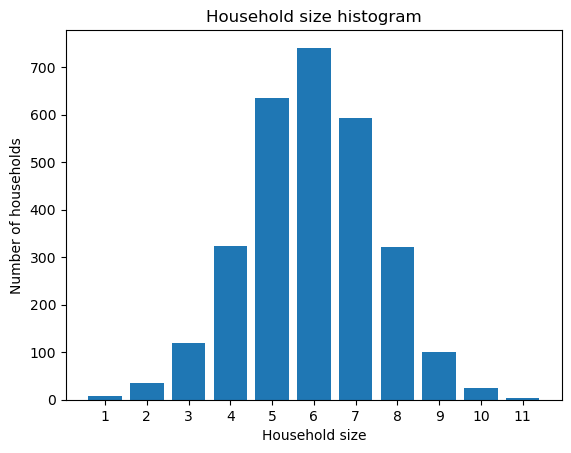

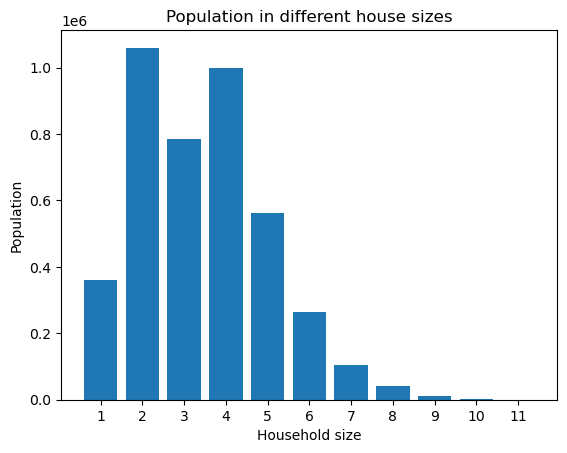

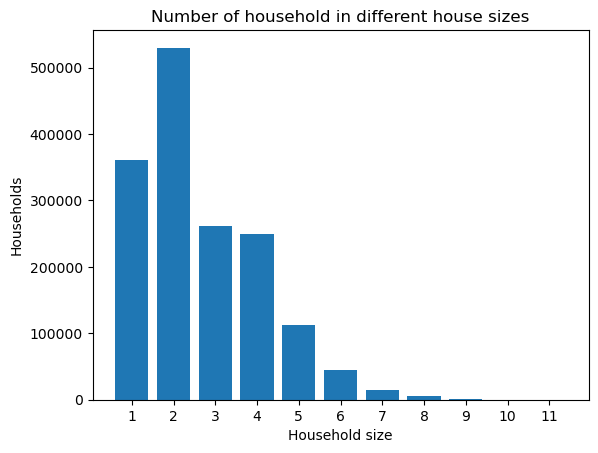

In [11]:
house_size = []
house_nums =  np.zeros(int(max(A[:,9]/A[:,8])))
housesize_pop = np.zeros(int(max(A[:,9]/A[:,8])))
houses_pop = np.zeros(int(max(A[:,9]/A[:,8])))
(rows, cols) = A.shape

for i in range(0, rows):
    size = int(A[i,9]/A[i,8])
    house_size.append(size)
    house_nums[size-1] = house_nums[size-1]+1
    housesize_pop[size-1] = housesize_pop[size-1]+A[i,9]
    houses_pop[size-1] = houses_pop[size-1]+A[i,8]
   
x = np.arange(1,12,1)
fig, ax = plt.subplots()
ax.bar(x, house_nums)
plt.xticks(np.arange(1,12, step=1))
plt.title(f'Household size histogram')
plt.ylabel(f'Number of households')
plt.xlabel(f'Household size')


print(house_nums)
print(housesize_pop)

fig, ax = plt.subplots()
ax.bar(np.arange(1,12,1), housesize_pop, label='Total Population')
plt.xticks(np.arange(1,12, step=1))
plt.title(f'Population in different house sizes')
plt.ylabel(f'Population')
plt.xlabel(f'Household size')

fig, ax = plt.subplots()
ax.bar(np.arange(1,12,1), houses_pop, label='Total Households')
plt.xticks(np.arange(1,12, step=1))
plt.title(f'Number of household in different house sizes')
plt.ylabel(f'Households')
plt.xlabel(f'Household size')

In [12]:
print(house_nums)
print(housesize_pop)
print(houses_pop)

staty = []
for i in range(0,len(housesize_pop)):
    staty.append((i+1)*housesize_pop)

print(f'Mean house size is {sum(housesize_pop)/sum(houses_pop):.2f} people')
print(sum(housesize_pop))

[  8.  36. 120. 324. 636. 741. 594. 322. 100.  24.   3.]
[3.614820e+05 1.059666e+06 7.862940e+05 9.973200e+05 5.621400e+05
 2.642580e+05 1.041180e+05 4.036800e+04 9.747000e+03 2.100000e+03
 1.980000e+02]
[3.61482e+05 5.29833e+05 2.62098e+05 2.49330e+05 1.12428e+05 4.40430e+04
 1.48740e+04 5.04600e+03 1.08300e+03 2.10000e+02 1.80000e+01]
Mean house size is 2.65 people
4187691.0


# Making heatmap of household contact matrix

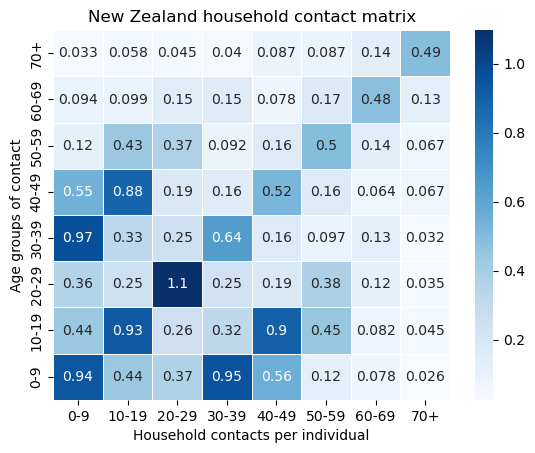

In [12]:
#fig, ax = plt.subplots()
sns.heatmap(household_matrix, cmap='Blues',annot=True, linewidth=0.5, cbar=True, 
            xticklabels = ('0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70+'), 
            yticklabels = ('70+','60-69','50-59','40-49','30-39','20-29', '10-19', '0-9'))
plt.title('New Zealand household contact matrix')
plt.xlabel('Household contacts per individual')
plt.ylabel('Age groups of contact')
plt.xticks()
plt.show()
#[::-1,::-1].T

# Prem et al Contact Matrix

In [13]:
'''Data from stats NZ on memebers of house hold first column is age group 0-10, each column increases age by 10 years 
until 9th column which is number of houses with the specific distribution of age casses, and final column is number of 
individuals in the households of the specific distribution'''
#Take data from StatsNZ excel sheet based on 2018 Census of Population and Dwellings and turn it into a matrix to run calculations on

A = np.zeros((16)).astype(float)

f = open("NZ Household Contact Matrix.csv", "r", encoding='utf-8')
lines = f.readlines()
for line in lines[:]:
    line = line.split(",")
    line = [word.strip('"') for word in line]
    for i in range(0, len(line)):
        line[i] = float(line[i])
    A = np.vstack([A, line])

prem = np.flipud(A[1:])
print(prem)
#print(prem.shape)
    

[[0.22804635 0.27853235 0.43533217 0.34899492 0.0863208  0.08078878
  0.10284533 0.21540855 0.24852686 0.26572571 0.30076497 0.1249431
  0.05772146 0.09515185 0.09334195 0.30243329]
 [0.12475022 0.37312563 0.34199852 0.2640163  0.05227647 0.1084266
  0.09793351 0.22748871 0.25660528 0.17881268 0.10684548 0.0566686
  0.12033506 0.16283335 0.44623276 0.09834255]
 [0.25900328 0.39123305 0.35005123 0.18625389 0.12573155 0.13713473
  0.23290283 0.28628351 0.24935465 0.07920057 0.07436352 0.11119206
  0.15894962 0.64930374 0.09072893 0.01473421]
 [0.36172308 0.3410898  0.23482434 0.20669709 0.146121   0.20838566
  0.27996355 0.19390831 0.09643393 0.05076021 0.09892073 0.20044439
  0.661396   0.11463994 0.0236853  0.00717463]
 [0.32436796 0.33723788 0.23290612 0.31627311 0.28611536 0.33525276
  0.25275788 0.08227311 0.04480936 0.13104526 0.2224272  0.71989751
  0.14535466 0.04402436 0.00749295 0.02160358]
 [0.19931033 0.18258333 0.33314037 0.43393516 0.38584203 0.229159
  0.09215189 0.0510098

# Convert Prem from 5 to 10 year age groups

In [14]:
prem_10 = np.arange(64).reshape(8,8).astype('float')
(r, c) = prem_10.shape
                    
for i in range(0,r):
    for j in range(0,c):
        prem_10[i,j] = (prem[2*i,2*j] + prem[2*i+1, 2*j] + prem[2*i,2*j+1] + prem[2*i+1, 2*j+1])/2
print(prem_10)

[[0.50222727 0.69517095 0.16390632 0.32183805 0.47483527 0.29461107
  0.21802086 0.47017528]
 [0.67652461 0.48891327 0.30868648 0.4965291  0.23787468 0.24246035
  0.79214465 0.06816154]
 [0.52174975 0.65812739 0.61818457 0.23909638 0.22643932 0.90132648
  0.11421028 0.03231572]
 [0.61355932 1.16183565 0.279411   0.19237975 0.92429414 0.11377546
  0.03736703 0.02237771]
 [1.10955448 0.51627577 0.16128913 1.05326015 0.1445973  0.06818281
  0.06103206 0.01087845]
 [0.38744423 0.32665939 1.38176069 0.16223217 0.3262513  0.3523588
  0.04549318 0.00965775]
 [0.43754271 1.89794684 0.18429476 0.40950665 0.87849233 0.20499832
  0.02905159 0.01382757]
 [1.32888212 0.50971151 0.379031   1.20423562 0.50558552 0.10029831
  0.0377227  0.01317214]]


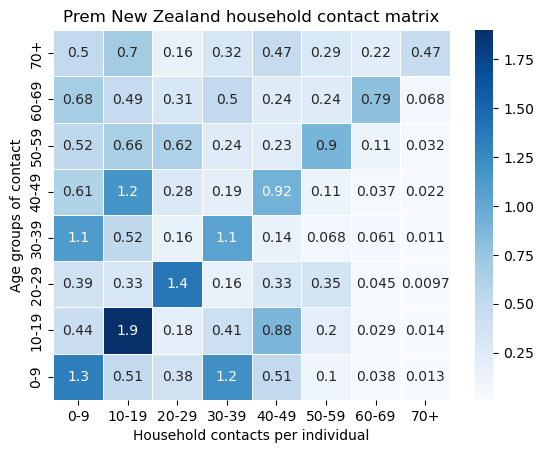

In [16]:
fig, ax = plt.subplots()
sns.heatmap(prem_10, cmap='Blues',annot=True, linewidth=0.5, cbar=True, 
            xticklabels = ('0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70+'), 
            yticklabels = ('70+','60-69','50-59','40-49','30-39','20-29', '10-19', '0-9'))
plt.title('Prem New Zealand household contact matrix')
plt.xlabel('Household contacts per individual')
plt.ylabel('Age groups of contact')
plt.xticks()
plt.show()

In [17]:
census_data = [65894+74237,96700+102978, 116504+112660,134597+142660,154309+163721,
              155714+163925,160560+170130,147907+154555,157740+161833,173670+177252,
               190177+183946,173622+162970,160840+154232,164739+157437,168310+161164, 156513+149277]
print(census_data)
prem_10 = np.arange(64).reshape(8,8).astype('float')
(r, c) = prem_10.shape
                    
for i in range(0,r):
    for j in range(0,c):
        prem_10[i,j] = (census_data[2*i]*(prem[2*i,2*j] +prem[2*i, 2*j+1]) + census_data[2*i+1]*(prem[2*i+1,2*j] + prem[2*i+1, 2*j+1]))/(census_data[2*i+1]+census_data[2*i])
print(prem_10)

[140131, 199678, 229164, 277257, 318030, 319639, 330690, 302462, 319573, 350922, 374123, 336592, 315072, 322176, 329474, 305790]
[[0.50146474 0.67954753 0.163345   0.32246613 0.46792791 0.27163807
  0.2294371  0.48321289]
 [0.67902111 0.48441264 0.31303786 0.49437742 0.22926307 0.24786439
  0.79061487 0.06461913]
 [0.52139685 0.65840229 0.61817654 0.23885431 0.22656695 0.90122303
  0.11402061 0.03232384]
 [0.60501167 1.16018115 0.28565578 0.18906457 0.92347484 0.11669932
  0.03678126 0.02256763]
 [1.10578156 0.5046031  0.16589519 1.0536971  0.14179614 0.06946514
  0.06142791 0.01082865]
 [0.39593299 0.31599288 1.37442117 0.16664628 0.31386187 0.34999168
  0.04638104 0.00961599]
 [0.43991112 1.89907876 0.1834128  0.41150153 0.87840093 0.20399443
  0.02901632 0.0138598 ]
 [1.32996052 0.51419668 0.37332654 1.20177563 0.51170648 0.09996213
  0.03746374 0.01308732]]


## Create Prem heatmap

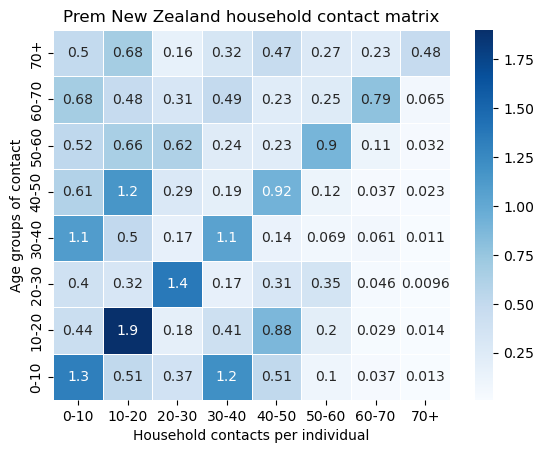

In [18]:
fig, ax = plt.subplots()
sns.heatmap(prem_10, cmap='Blues',annot=True, linewidth=0.5, cbar=True, 
            xticklabels = ('0-10','10-20','20-30','30-40','40-50','50-60', '60-70', '70+'), 
            yticklabels = ('70+','60-70','50-60','40-50','30-40','20-30', '10-20', '0-10'))
plt.title('Prem New Zealand household contact matrix')
plt.xlabel('Household contacts per individual')
plt.ylabel('Age groups of contact')
plt.xticks()
plt.show()

# Comparing StatsNZ and Prem Matrices

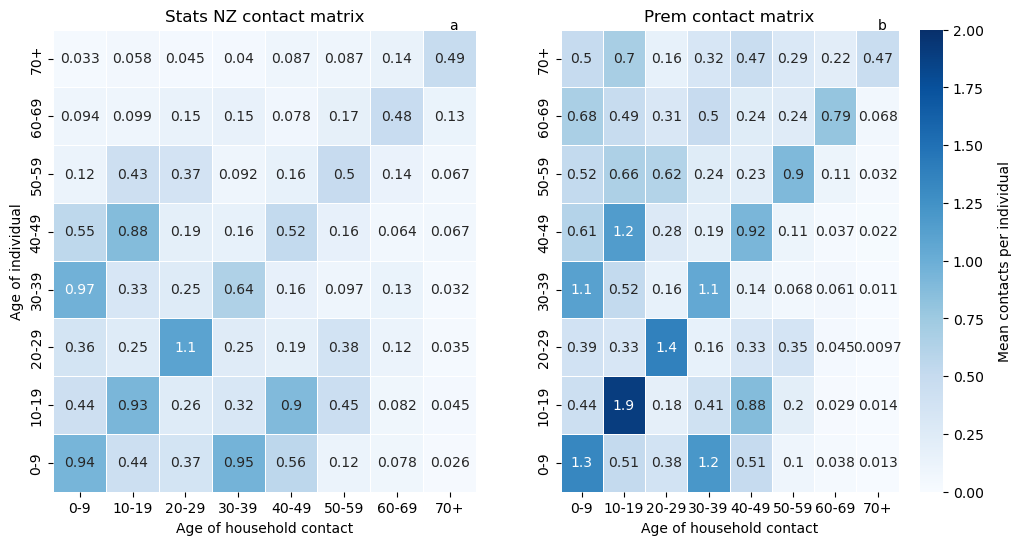

In [17]:
fig,ax = plt.subplots(1,2,figsize=(12,6))
sns.heatmap(household_matrix, cmap='Blues',annot=True, linewidth=0.5, vmin=0, vmax=2, cbar=False, 
            xticklabels = ('0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70+'), 
            yticklabels = ('70+','60-69','50-59','40-49','30-39','20-29', '10-19', '0-9'), ax=ax[0])
sns.heatmap(prem_10, cmap='Blues',annot=True, linewidth=0.5, vmin=0, vmax=2, cbar=True, 
            xticklabels = ('0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70+'), 
            yticklabels = ('70+','60-69','50-59','40-49','30-39','20-29', '10-19', '0-9'), ax=ax[1])

cbar = ax[1].collections[0].colorbar
cbar.set_label("Mean contacts per individual", labelpad=10)

ax[0].set_title(f'Stats NZ contact matrix')
ax[1].set_title(f'Prem contact matrix')
ax[0].set_xlabel('Age of household contact')
ax[1].set_xlabel('Age of household contact')
ax[0].set_ylabel('Age of individual')
ax[0].annotate('a', xy=(7.5,0))
ax[1].annotate('b', xy=(7.5,0))
plt.show()

[[-4.69053704e-01 -6.37143454e-01 -1.18585679e-01 -2.81926212e-01
  -3.87965450e-01 -2.07244456e-01 -7.72728629e-02  1.79750201e-02]
 [-5.82914312e-01 -3.89910737e-01 -1.60929949e-01 -3.43926800e-01
  -1.60013137e-01 -6.90067467e-02 -3.14019756e-01  6.42741889e-02]
 [-4.02832958e-01 -2.23163336e-01 -2.43744856e-01 -1.46700298e-01
  -6.44583649e-02 -4.05598251e-01  2.62012782e-02  3.42312065e-02]
 [-6.53840473e-02 -2.79095803e-01 -9.14945053e-02 -3.32193751e-02
  -4.02320688e-01  5.03477055e-02  2.64958474e-02  4.46658958e-02]
 [-1.38690142e-01 -1.89929550e-01  9.25450218e-02 -4.10989681e-01
   2.01916633e-02  2.87459542e-02  6.85603956e-02  2.10136665e-02]
 [-2.71308475e-02 -7.28973976e-02 -2.84194838e-01  8.30683843e-02
  -1.38230229e-01  2.72440682e-02  7.57657651e-02  2.53388730e-02]
 [-5.31253051e-04 -9.72287684e-01  7.31464543e-02 -8.95592764e-02
   1.75445020e-02  2.42356834e-01  5.33745461e-02  3.16309630e-02]
 [-3.90519852e-01 -7.15086482e-02 -1.24969867e-02 -2.49812585e-01
   

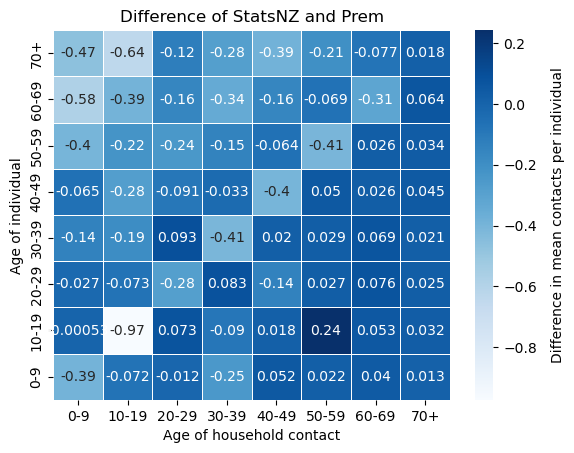

In [18]:
matrix_differences = household_matrix-prem_10
print(matrix_differences)
fig, ax = plt.subplots()
sns.heatmap(matrix_differences, cmap='Blues',annot=True, linewidth=0.5, cbar=True, 
            xticklabels = ('0-9','10-19','20-29','30-39','40-49','50-59', '60-69', '70+'), 
            yticklabels = ('70+','60-69','50-59','40-49','30-39','20-29', '10-19', '0-9'))

cbar = ax.collections[0].colorbar
cbar.set_label("Difference in mean contacts per individual", labelpad=10)

plt.title('Difference of StatsNZ and Prem')
plt.xlabel('Age of household contact')
plt.ylabel('Age of individual')
plt.xticks()
plt.show()

# Checking accuracy of Prem prediction

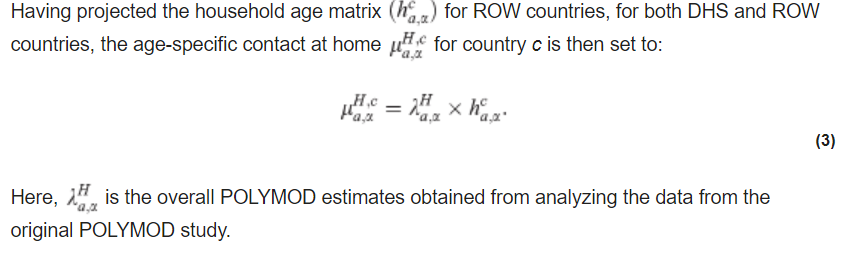

## Standard Deviation

In [19]:
#print(household_matrix)#household matrix is the mean household contact by age group
standard_dev_matrix = np.zeros((8,8)).astype(float)
nintyfivepercent_conf = np.zeros((8,8)).astype(float) #Used to find 95% confidence interval
z_score = np.zeros((8,8)).astype(float) #Find Z score 


#practice making houssehold contact matrix
(rows,cols) = B.shape
population_group = []
sums = 0
for i in range(0, cols-2):
    for j in range(0, rows):
        sums = sums + B[ j, i]* B[j, 8]
    population_group.append(sums)
    sums=0
#print(population_group)

stan_dev = []
lists = []
total_contacts = []
summed = 0
#household_matrix = np.zeros((cols-2)).astype(float)
#print(household_matrix)

k = 0
while k < 8:
    for i in range(0, rows):
        if B[i, k] != 0:
            lists.append(i)
#Standard deviation of discrete data        
    for j in range(0, cols-2):
        for z in range(0, len(lists)):
            if j==k: 
                stan_dev.append((household_matrix[k,j] - (B[lists[z],j]-1))**2)
            else:
                stan_dev.append((household_matrix[k,j] - B[lists[z],j])**2)
        stan_devy = np.sqrt(sum(stan_dev)/empiracal_tot[k])
        standard_dev_matrix[k, j] = stan_devy
        #95% confidence interval for discrete data
        #nintyfivepercent_conf[k,j] = 1.96*(stan_devy/np.sqrt(len(lists))) #confidence level of 95percent
        stan_dev = []
        
        #print(summed)
        #print(len(lists))
        #print( household_matrix[k,j])
        summed = 0
    #print(population_per_group)
    #print(population_per_group/ population_group[k])
    k +=1
    lists = []
    
standard_dev_matrix = np.flipud(standard_dev_matrix)
print(f'Standard Deviation is:{standard_dev_matrix}')

#nintyfivepercent_conf = np.flipud(nintyfivepercent_conf)
#print(f'95% confidence intreval within {nintyfivepercent_conf} of the mean household contacts amount')

#z_score = np.flipud(z_score)
#print(f'Z value is: {z_score}')

Standard Deviation is:[[0.03775515 0.04082731 0.037264   0.03451107 0.03181571 0.03298282
  0.02558007 0.02296701]
 [0.05171783 0.0455051  0.05003517 0.04670672 0.0366599  0.02738852
  0.02679081 0.02341134]
 [0.05647558 0.06427737 0.05357301 0.04142067 0.03128551 0.02584975
  0.02602856 0.02840999]
 [0.05661852 0.08032598 0.05789372 0.03930369 0.03329916 0.03159512
  0.03216517 0.0317533 ]
 [0.07678248 0.05994307 0.06471968 0.04752616 0.03634425 0.03833889
  0.04132406 0.02676458]
 [0.08148807 0.06768555 0.06672645 0.05612387 0.04465017 0.04013896
  0.0349641  0.02841582]
 [0.08454719 0.077285   0.07143672 0.05511576 0.05742899 0.04390899
  0.03479664 0.03072853]
 [0.07615519 0.09000558 0.07831091 0.07151201 0.05318853 0.04313779
  0.03882257 0.03148491]]


# Confidence interval of Prem data

## Plotting standard deviation

IndexError: index 8 is out of bounds for axis 0 with size 8

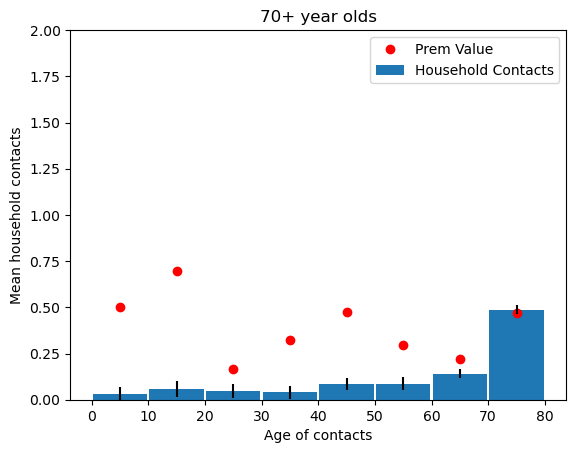

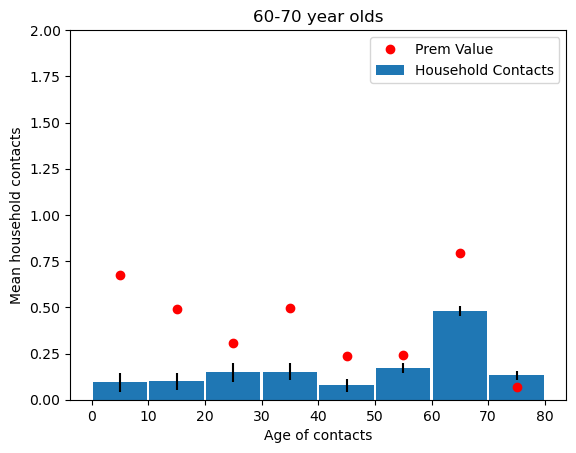

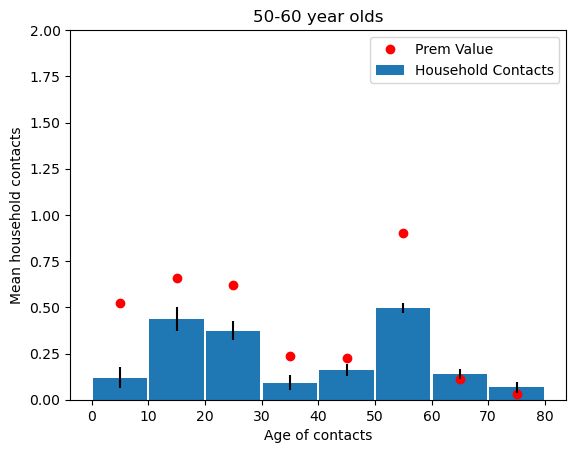

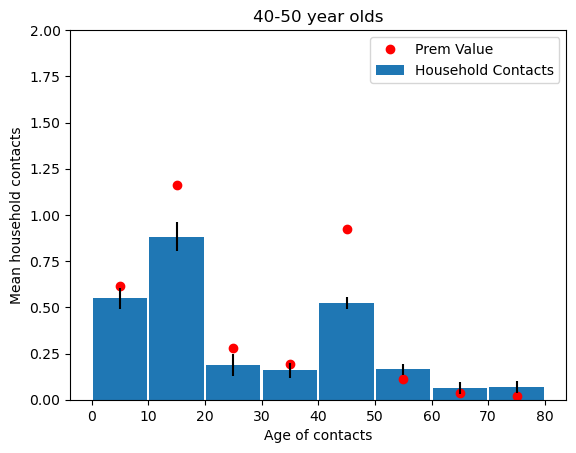

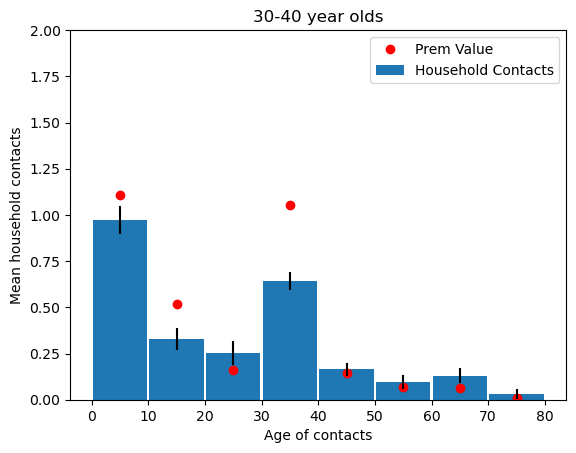

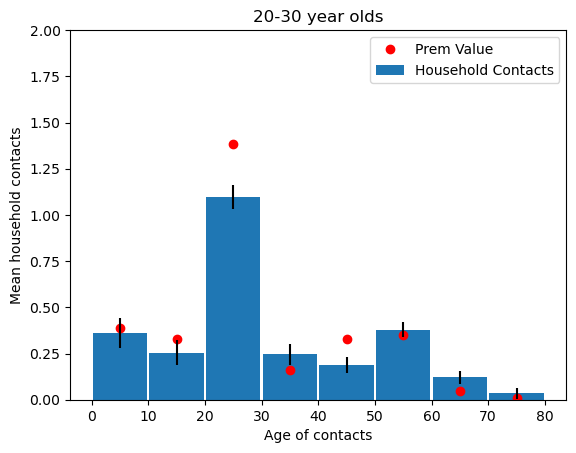

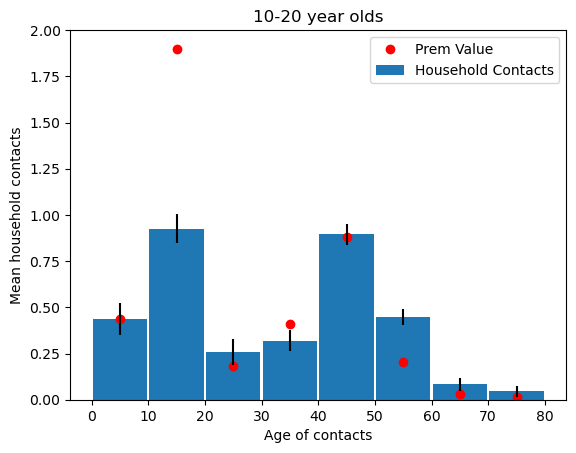

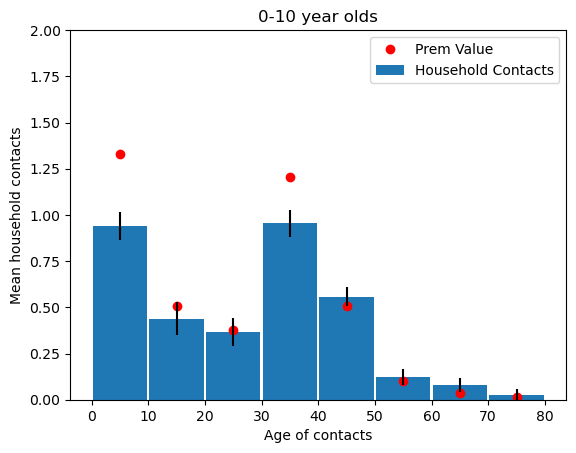

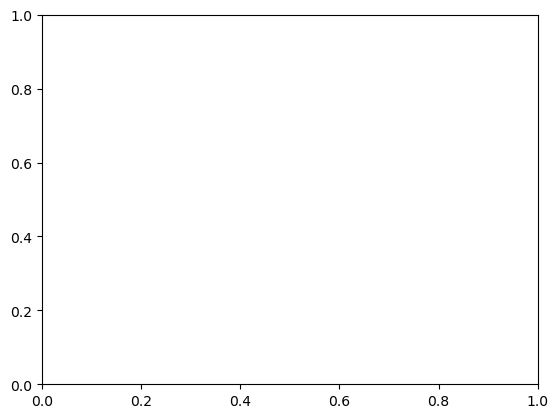

In [21]:
value = 0
while value < 8:
    fig,ax=  plt.subplots()
    #plt.errorbar(np.linspace(5,75,8), household_matrix[value,:], nintyfivepercent_conf[value,:], fmt='r', label='Standard Deviation')
    ax.plot(np.linspace(5,75,8), prem_10[value,:], 'ro', label='Prem Value')
    plt.bar(np.linspace(5,75,8), household_matrix[value,:], width=9.6, yerr= standard_dev_matrix[value,:], label='Household Contacts')
    #plt.xticks(np.arange(1,12, step=1))
    if value ==0:
        plt.title(f'70+ year olds')
    else:
        plt.title(f'{80-10*(value+1)}-{80-10*value} year olds')
    plt.ylabel(f'Mean household contacts')
    plt.xlabel(f'Age of contacts')
    plt.ylim(0,2)
    plt.legend()
    value +=1
    
fig,ax=  plt.subplots()
#plt.errorbar(np.linspace(5,75,8), household_matrix[value,:], nintyfivepercent_conf[value,:], fmt='r', label='Standard Deviation')
ax.plot(np.linspace(5,75,8), sum(prem_10[value,:]), 'ro', label='Prem Value')
plt.bar(np.linspace(5,75,8), household_matrix[value,:], width=9.6, yerr= standard_dev_matrix[value,:], label='Household Contacts')
#plt.xticks(np.arange(1,12, step=1))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


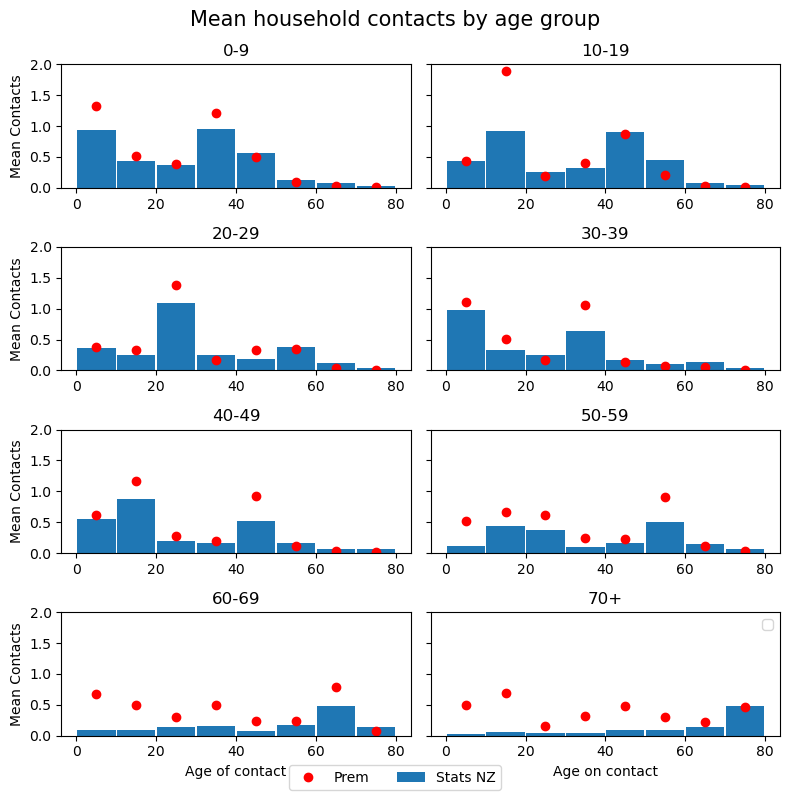

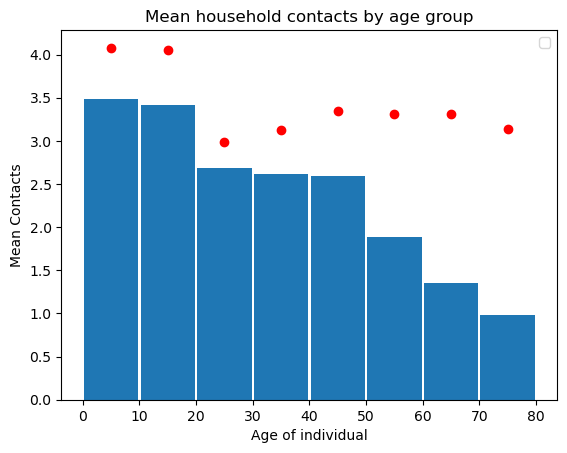

In [23]:
fig,ax=  plt.subplots(4,2, figsize=(8,8), sharey=True)
fig.suptitle(f'Mean household contacts by age group', fontsize=15)

ax[3][1].plot(np.linspace(5,75,8), prem_10[0,:], 'ro')
ax[3][1].bar(np.linspace(5,75,8), household_matrix[0,:], width=9.6)
ax[3][1].set_title(f'70+')
ax[3][1].set_xlabel('Age on contact')

ax[3][0].plot(np.linspace(5,75,8), prem_10[1,:], 'ro')
ax[3][0].bar(np.linspace(5,75,8), household_matrix[1,:], width=9.6)
ax[3][0].set_title(f'60-69')
ax[3][0].set_xlabel('Age of contact')
ax[3][0].set_ylabel('Mean Contacts')

ax[2][1].plot(np.linspace(5,75,8), prem_10[2,:], 'ro')
ax[2][1].bar(np.linspace(5,75,8), household_matrix[2,:], width=9.6)
ax[2][1].set_title(f'50-59')

ax[2][0].plot(np.linspace(5,75,8), prem_10[3,:], 'ro')
ax[2][0].bar(np.linspace(5,75,8), household_matrix[3,:], width=9.6)
ax[2][0].set_title(f'40-49')
ax[2][0].set_ylabel('Mean Contacts')

ax[1][1].plot(np.linspace(5,75,8), prem_10[4,:], 'ro')
ax[1][1].bar(np.linspace(5,75,8), household_matrix[4,:], width=9.6)
ax[1][1].set_title(f'30-39')

ax[1][0].plot(np.linspace(5,75,8), prem_10[5,:], 'ro')
ax[1][0].bar(np.linspace(5,75,8), household_matrix[5,:], width=9.6)
ax[1][0].set_title(f'20-29')
ax[1][0].set_ylabel('Mean Contacts')

ax[0][1].plot(np.linspace(5,75,8), prem_10[6,:], 'ro')
ax[0][1].bar(np.linspace(5,75,8), household_matrix[6,:], width=9.6)
ax[0][1].set_title(f'10-19')
ax[0][1].set_ylim(0,2)

ax[0][0].plot(np.linspace(5,75,8), prem_10[7,:], 'ro', label='Prem')
ax[0][0].bar(np.linspace(5,75,8), household_matrix[7,:], width=9.6, label='Stats NZ')
ax[0][0].set_title(f'0-9')
ax[0][0].set_ylabel('Mean Contacts')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center',  ncols=2)
fig.tight_layout()
plt.legend()

fig,ax = plt.subplots()
prem_summed = [sum(prem_10[7,:]),sum(prem_10[6,:]),sum(prem_10[5,:]),sum(prem_10[4,:]),sum(prem_10[3,:]),sum(prem_10[2,:]),sum(prem_10[1,:]),sum(prem_10[0,:])]

statsnz_summed = [sum(household_matrix[7,:]),sum(household_matrix[6,:]),sum(household_matrix[5,:]),sum(household_matrix[4,:]),sum(household_matrix[3,:]),sum(household_matrix[2,:]),sum(household_matrix[1,:]),sum(household_matrix[0,:]),]

ax.plot(np.linspace(5,75,8), prem_summed, 'ro')
ax.bar(np.linspace(5,75,8), statsnz_summed, width=9.6)
ax.set_title(f'Mean household contacts by age group')
ax.set_xlabel('Age of individual')
ax.set_ylabel('Mean Contacts')
plt.legend()


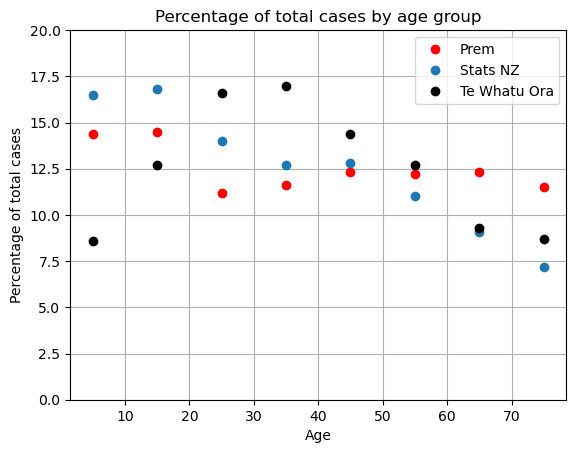

In [24]:
prem= [14.4,14.5,11.2,11.6,12.3,12.2,12.3,11.5]
statsnz=[16.5,16.8,14.0,12.7,12.8,11.0,9.1,7.2]
ora= [8.6,12.7,16.6,17.0,14.4,12.7,9.3,8.7]
fig,ax = plt.subplots()
ax.grid(True)
ax.plot(np.linspace(5,75,8), prem, 'ro', label='Prem')
ax.plot(np.linspace(5,75,8), statsnz, 'o', label='Stats NZ')
ax.plot(np.linspace(5,75,8), ora, 'ko', label='Te Whatu Ora')
ax.set_title(f'Percentage of total cases by age group')
ax.set_ylim(0,20)
ax.set_xlabel('Age')
ax.set_ylabel(f'Percentage of total cases')
plt.legend()

# Modelling Pandemic (Varying R_0)

In [25]:
b = np.array([[2,1,1],
             [1,2,1],
             [1,1,2]])

wb, vb = np.linalg.eig(b)
print(wb)
print(vb[:,0])
b_norm = max(wb).real #dominant eigenvalue #dominant eigen value
print(b_norm)

[1. 4. 1.]
[-0.81649658  0.40824829  0.40824829]
3.9999999999999987


In [26]:
w, v = np.linalg.eig(household_matrix)
print(w)
print(v)
household_matrix_norm = max(w).real #dominant eigenvalue #dominant eigen value


#matrix norm of household contact matrix
N = np.array(empiracal_tot[::-1]).reshape(8,1) #total population size
print(N)
R_0 = 1.2 #how many people each infected individual infects (average)
mu = 0.1 # mu is inverse of infectious period, mu = 0.05, mu=0.2
gamma = 0.2 # one over the latent period of covid, gamma=0.3, gamma=0.1

ws, vs = np.linalg.eig(prem_10)
print(max(ws))
prem_10_norm = max(ws).real
#print(np.array(empiracal_tot[::-1]).reshape(8,1))

[ 2.13534631+0.j          0.80302168+0.j         -0.78994135+0.j
 -0.39026601+0.40223845j -0.39026601-0.40223845j  0.13050094+0.13411484j
  0.13050094-0.13411484j -0.31024345+0.j        ]
[[ 0.1899072 +0.j         -0.23620631+0.j          0.13354249+0.j
   0.46722806+0.j          0.46722806-0.j          0.4354207 -0.02297613j
   0.4354207 +0.02297613j -0.05403874+0.j        ]
 [ 0.24321845+0.j          0.01295366+0.j         -0.32135791+0.j
   0.32552019-0.00173743j  0.32552019+0.00173743j -0.50699793+0.j
  -0.50699793-0.j          0.02626411+0.j        ]
 [ 0.28446904+0.j          0.44215267+0.j          0.15740193+0.j
   0.01629148-0.0362011j   0.01629148+0.0362011j  -0.0568017 +0.06059432j
  -0.0568017 -0.06059432j  0.49065458+0.j        ]
 [ 0.34080774+0.j         -0.19541742+0.j          0.43071069+0.j
  -0.36687716-0.19788855j -0.36687716+0.19788855j -0.39490303+0.11579516j
  -0.39490303-0.11579516j -0.23772498+0.j        ]
 [ 0.33931097+0.j         -0.31182101+0.j         -0.409

In [69]:
#Household Matrix modelling
#w, v = np.linalg.eig(household_matrix)
#household_matrix_norm = max(w).real #dominant eigenvalue
#print(household_matrix_norm)
beta = (R_0 * mu)/(household_matrix_norm)
print(beta)#Added a random 100
#print(N,R_0,mu,gamma)

def pandemic_model(y, t, beta, gamma, mu):
    S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,I1,I2,I3,I4,I5,I6,I7,I8 = y
    S = np.array((S1,S2,S3,S4,S5,S6,S7,S8)).reshape(8,1)
    E = np.array((E1,E2,E3,E4,E5,E6,E7,E8)).reshape(8,1)
    I = np.array((I1,I2,I3,I4,I5,I6,I7,I8)).reshape(8,1)
    #print(S)
    #print(E)
    #print(I)
    #print(N)
    #print(household_matrix@I)
    #print(E)
    #print(f'Value is {household_matrix @ I}')
    dSdt = -beta * (household_matrix @ I)*(S/N) #divide each popultion ngroup by their size NOT TOTAL SIZE
    dEdt = beta*(household_matrix @ I)*(S/N) - gamma*E
    #print(dEdt)
    dIdt = gamma*E - mu*I
    return dSdt[0,0], dSdt[1,0], dSdt[2,0],dSdt[3,0],dSdt[4,0],dSdt[5,0],dSdt[6,0],dSdt[7,0], dEdt[0,0], dEdt[1,0], dEdt[2,0],dEdt[3,0],dEdt[4,0],dEdt[5,0],dEdt[6,0],dEdt[7,0],dIdt[0,0], dIdt[1,0], dIdt[2,0],dIdt[3,0],dIdt[4,0],dIdt[5,0],dIdt[6,0],dIdt[7,0]

S0 = np.array(empiracal_tot[::-1])
#E0 = np.array([100,1000,100,100,100,100,100,100])
E0 = np.array([0,0,0,0,0,0,1700,0])
I0 = np.array([0,0,0,0,0,0,0,0])
y0 = np.concatenate((S0, E0, I0))#.reshape(3,8)
t = np.linspace(0, 100, 100)

y = odeint(pandemic_model, y0, t, args=(beta, gamma,mu))
S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,I1,I2,I3,I4,I5,I6,I7,I8 = y.T
#print(S2)

#plt.plot(S2) #All are giving the same output
#Number eighht plots youngest age group, smaller numbers = larger age groups
#plt.plot(I8+I7+I6+I5+I4+I3+I2+I1, label='Infectious')
#plt.plot(E8+E7+E6+E5+E4+E3+E2+E1, label='Exposed')
#plt.plot(S8+S7+S6+S5+S4+S3+S2+S1, label='Susceptable')
#plt.title(f'Stats NZ pandemic, R_0={R_0}, μ={mu}, γ={gamma}')
#plt.xlabel(f'Days')
#plt.ylabel(f'Population')
#plt.legend()
#print(max(I8+I7+I6+I5+I4+I3+I2+I1))

I_statsnz = I8+I7+I6+I5+I4+I3+I2+I1
E_statsnz = E8+E7+E6+E5+E4+E3+E2+E1
S_statsnz = S8+S7+S6+S5+S4+S3+S2+S1
print(I2)


#plt.plot(t, [:, 0], 'b', label='Susceptible')
#plt.plot(t, sol[:, 1], 'g', label='Exposed')
#plt.plot(t, sol[:, 2], 'r', label='Infectious')
#plt.plot(t, sol[:, 3], 'k', label='Recovered')
#plt.legend(loc='best')
#plt.xlabel('t')
#plt.title(f'Infection of {80-10*i}-{80-10*(i+1)} year olds by {10*j}-{10*(j+1)} year olds')
#plt.grid()
#plt.show()


0.056196973437761456
[  0.           0.26983813   1.85776079   5.40086081  11.03790788
  18.60542858  27.7735028   38.13762222  49.27881898  60.80114656
  72.35323523  83.63886845  94.42019076 104.51615807 113.79809545
 122.1836728  129.63020159 136.12785574 141.69320218 146.36327372
 150.19030447 153.23717491 155.57356256 157.27276141 158.40911377
 159.05599144 159.28425403 159.16111806 158.74937066 158.10686927
 157.28627275 156.33495717 155.2950749  154.20372217 153.09318575
 151.99124408 150.9215032  149.90375126 148.9543191  148.08643717
 147.3105813  146.6348023  146.06503542 145.60538757 145.25840101
 145.02529317 144.90617262 144.9002321  145.00591975 145.22108964
 145.54313318 145.96909288 146.49576013 147.11975841 147.83761351
 148.64581221 149.54085065 150.51927381 151.577707   152.71288082
 153.92165007 155.20100778 156.54809501 157.9602071  159.43479704
 160.96947648 162.56201433 164.21033425 165.91251119 167.66676624
 169.47146121 171.32509272 173.22628561 175.17378688 17

In [28]:
max_index = max(enumerate(I_statsnz), key=lambda item: item[1])[0]
print(max_index)
max_index = max(enumerate(E_statsnz), key=lambda item: item[1])[0]
print(max_index)

372
362


## Keeping the pandemic spread with different R_0 values for StatsNZ

In [29]:
I_statsnz_R0_32 = I_statsnz
E_statsnz_R0_32 = E_statsnz
S_statsnz_R0_32 =S_statsnz

In [30]:
I_statsnz_R0_12
E_statsnz_R0_12
S_statsnz_R0_12
I_statsnz_R0_17
E_statsnz_R0_17
S_statsnz_R0_17
I_statsnz_R0_22
E_statsnz_R0_22
S_statsnz_R0_22
I_statsnz_R0_27
E_statsnz_R0_27
S_statsnz_R0_27
I_statsnz_R0_32
E_statsnz_R0_32
S_statsnz_R0_32

NameError: name 'I_statsnz_R0_12' is not defined

In [31]:
plt.plot(I_statsnz_R0_12, label='R_0=1.2')
plt.plot(I_statsnz_R0_17, label='R_0=1.7')
plt.plot(I_statsnz_R0_22, label='R_0=2.2')
plt.plot(I_statsnz_R0_27, label='R_0=2.7')
plt.plot(I_statsnz_R0_32, label='R_0=3.2')
plt.title(f'Infectious pop of Stats NZ pandemic with varying R_0, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Population')
plt.legend()

NameError: name 'I_statsnz_R0_12' is not defined

In [32]:
plt.plot(E_statsnz_R0_12, label='R_0=1.2')
plt.plot(E_statsnz_R0_17, label='R_0=1.7')
plt.plot(E_statsnz_R0_22, label='R_0=2.2')
plt.plot(E_statsnz_R0_27, label='R_0=2.7')
plt.plot(E_statsnz_R0_32, label='R_0=3.2')
plt.title(f'Exposed pop of Stats NZ pandemic with varying R_0, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Population')
plt.legend()

NameError: name 'E_statsnz_R0_12' is not defined

In [33]:
plt.plot(S_statsnz_R0_12, label='R_0=1.2')
plt.plot(S_statsnz_R0_17, label='R_0=1.7')
plt.plot(S_statsnz_R0_22, label='R_0=2.2')
plt.plot(S_statsnz_R0_27, label='R_0=2.7')
plt.plot(S_statsnz_R0_32, label='R_0=3.2')
plt.title(f'Susceptable pop of Stats NZ pandemic with varying R_0, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Population')
plt.legend()

NameError: name 'S_statsnz_R0_12' is not defined

## Prem Modelling

In [70]:
#Prem modelling
#ws, vs = np.linalg.eig(prem_10)
#prem_10_norm = np.linalg.norm(prem_10) #matrix norm of prem matrix
#prem_10_norm = max(ws).real
#print(prem_10_norm)

#N = np.array(empiracal_tot[::-1]).reshape(8,1) #total population size
#R_0 = 1.2 #how many people each infected individual infects (average)
#mu = 0.2 # mu is inverse of infectious period

beta = (R_0 * mu)/(prem_10_norm)
print(beta)
print(N,R_0,mu,gamma)
#gamma = 1/5.6 # one over the dormant period of covid 

def pandemic_model(y, t, beta, gamma, mu):
    S1p,S2p,S3p,S4p,S5p,S6p,S7p,S8p,E1p,E2p,E3p,E4p,E5p,E6p,E7p,E8p,I1p,I2p,I3p,I4p,I5p,I6p,I7p,I8p = y
    S = np.array((S1p,S2p,S3p,S4p,S5p,S6p,S7p,S8p)).reshape(8,1)
    E = np.array((E1p,E2p,E3p,E4p,E5p,E6p,E7p,E8p)).reshape(8,1)
    I = np.array((I1p,I2p,I3p,I4p,I5p,I6p,I7p,I8p)).reshape(8,1)
    #print(E)
    dSdt = -beta * (prem_10 @ I) * (S/N)
    #print(dSdt)
    dEdt = beta*(prem_10 @ I)*(S/N) - gamma*E
    #print(dEdt)
    dIdt = gamma*E - mu*I
    return dSdt[0,0], dSdt[1,0], dSdt[2,0],dSdt[3,0],dSdt[4,0],dSdt[5,0],dSdt[6,0],dSdt[7,0], dEdt[0,0], dEdt[1,0], dEdt[2,0],dEdt[3,0],dEdt[4,0],dEdt[5,0],dEdt[6,0],dEdt[7,0],dIdt[0,0], dIdt[1,0], dIdt[2,0],dIdt[3,0],dIdt[4,0],dIdt[5,0],dIdt[6,0],dIdt[7,0]


S0 = np.array(empiracal_tot[::-1])
E0 = np.array([0,0,0,0,0,0,1700,0])
#E0 = np.array([100,1000,100,100,100,100,100,100])
I0 = np.array([0,0,0,0,0,0,0,0])
y0 = np.concatenate((S0, E0, I0))#.reshape(3,8)
t = np.linspace(0, 100, 100)

y = odeint(pandemic_model, y0, t, args=(beta, gamma,mu))
S1p,S2p,S3p,S4p,S5p,S6p,S7p,S8p,E1p,E2p,E3p,E4p,E5p,E6p,E7p,E8p,I1p,I2p,I3p,I4p,I5p,I6p,I7p,I8p = y.T
#print(S2)

#plt.plot(S2) #All are giving the same output
#Number eighht plots youngest age group, smaller numbers = larger age groups
#plt.plot(I8p+I7p+I6p+I5p+I4p+I3p+I2p+I1p, label='Infectious Prem')
#plt.plot(E8p+E7p+E6p+E5p+E4p+E3p+E2p+E1p, label='Exposed Prem')
#plt.plot(S8p+S7p+S6p+S5p+S4p+S3p+S2p+S1p, label='Susceptable Prem')
#plt.title(f'Prem Pandemic, R_0={R_0}, μ={mu}, γ={gamma}')
#plt.xlabel(f'Days')
#plt.ylabel(f'Population')
#plt.legend()
#print(max(I8p+I7p+I6p+I5p+I4p+I3p+I2p+I1p))

I_prem = I8p+I7p+I6p+I5p+I4p+I3p+I2p+I1p
E_prem = E8p+E7p+E6p+E5p+E4p+E3p+E2p+E1p
S_prem = S8p+S7p+S6p+S5p+S4p+S3p+S2p+S1p


#plt.plot(t, [:, 0], 'b', label='Susceptible')
#plt.plot(t, sol[:, 1], 'g', label='Exposed')
#plt.plot(t, sol[:, 2], 'r', label='Infectious')
#plt.plot(t, sol[:, 3], 'k', label='Recovered')
#plt.legend(loc='best')
#plt.xlabel('t')
#plt.title(f'Infection of {80-10*i}-{80-10*(i+1)} year olds by {10*j}-{10*(j+1)} year olds')
#plt.grid()
#plt.show()



0.03620507597681188
[[428745]
 [455655]
 [562881]
 [555534]
 [536559]
 [555225]
 [547290]
 [545802]] 1.2 0.1 0.2


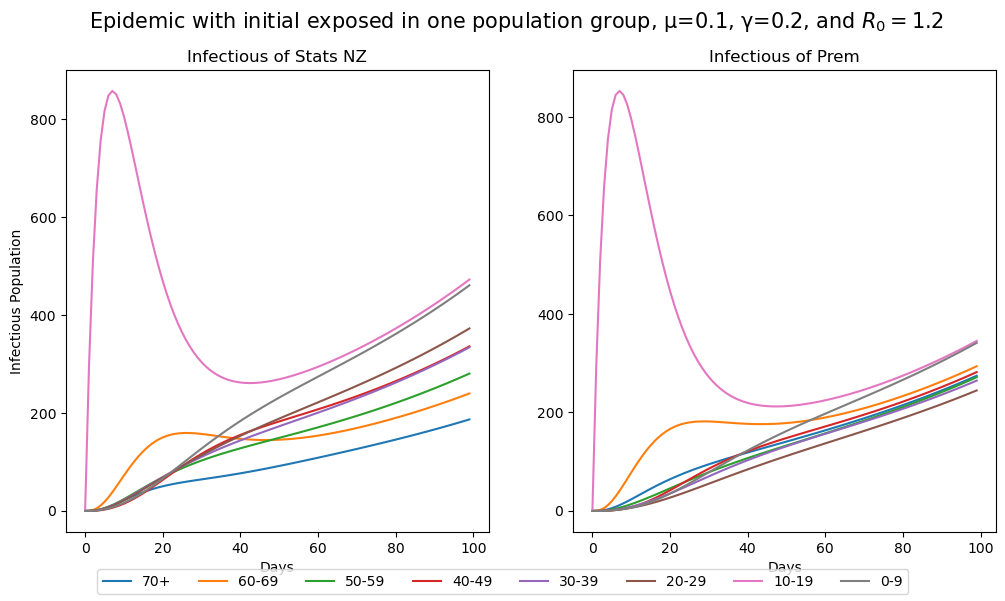

In [71]:
fig,ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle(f'Epidemic with initial exposed in one population group, μ=0.1, γ=0.2, and $R_0=1.2$', fontsize=15)

#Stats NZ
ax[0].set_title(f'Infectious of Stats NZ')
ax[0].plot(I1)
ax[0].plot(I2)
ax[0].plot(I3)
ax[0].plot(I4)
ax[0].plot(I5)
ax[0].plot(I6)
ax[0].plot(I7)
ax[0].plot(I8)
ax[0].set_ylabel(f'Infectious Population')
ax[0].set_xlabel(f'Days')

#Prem
ax[1].set_title(f'Infectious of Prem')
ax[1].plot(I1p,label='70+')
ax[1].plot(I2p,label='60-69')
ax[1].plot(I3p,label='50-59')
ax[1].plot(I4p,label='40-49')
ax[1].plot(I5p,label='30-39')
ax[1].plot(I6p, label='20-29')
ax[1].plot(I7p,label='10-19')
ax[1].plot(I8p,label='0-9')
ax[1].set_xlabel('Days')

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center',  ncols=8)
#fig.tight_layout()
plt.show()

In [36]:
max_index = max(enumerate(I_prem), key=lambda item: item[1])[0]
print(max_index)
max_index = max(enumerate(E_prem), key=lambda item: item[1])[0]
print(max_index)

361
351


[0.4034914366345138, 0.4088326490623376, 0.33717015446453347, 0.3159988998055715, 0.30788284786692854, 0.2600636141642011, 0.26602007915534454, 0.2244289675272776]
[0.34192561794691134, 0.34165103629839166, 0.26099928981465514, 0.27954564369363566, 0.28645878389839363, 0.27982566224099115, 0.3480166026553998, 0.34739933284508717]


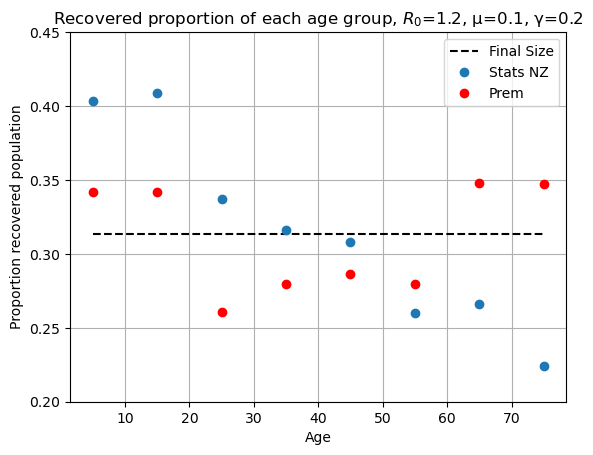

In [37]:
statsnz_percent = [1-(S8[-1]/S8[0]),1-(S7[-1]/S7[0]),1-(S6[-1]/S6[0]),1-(S5[-1]/S5[0]),1-(S4[-1]/S4[0]),1-(S3[-1]/S3[0]),1-(S2[-1]/S2[0]),1-(S1[-1]/S1[0])]
prem_percent = [1-(S8p[-1]/S8p[0]),1-(S7p[-1]/S7p[0]),1-(S6p[-1]/S6p[0]),1-(S5p[-1]/S5p[0]),1-(S4p[-1]/S4p[0]),1-(S3p[-1]/S3p[0]),1-(S2p[-1]/S2p[0]),1-(S1p[-1]/S1p[0])]
final_percent= [0.3137,0.3137,0.3137,0.3137,0.3137,0.3137,0.3137,0.3137]

print(statsnz_percent)
print(prem_percent)

fig,ax = plt.subplots()
ax.grid(True)
x = np.linspace(5,75,8)
plt.plot(x, final_percent, 'k--',label='Final Size')
plt.plot(x, statsnz_percent, 'o',label='Stats NZ')
plt.plot(x,prem_percent, 'ro',label='Prem')
plt.ylim(0.2, .45)
plt.title(f'Recovered proportion of each age group, $R_0$={R_0}, μ={mu}, γ={gamma}')
plt.ylabel(f'Proportion recovered population')
plt.xlabel(f'Age')
plt.legend()

## Keeping the pandemic spread with different R_0 values for Prem

In [38]:
I_prem_R0_32 = I_prem
E_prem_R0_32 = E_prem
S_prem_R10_32 =S_prem

In [39]:
I_prem_R0_12
E_prem_R0_12
S_prem_R10_12
I_prem_R0_17
E_prem_R0_17
S_prem_R10_17
I_prem_R0_22
E_prem_R0_22
S_prem_R10_22
I_prem_R0_27
E_prem_R0_27
S_prem_R10_27
I_prem_R0_32
E_prem_R0_32
S_prem_R10_32

NameError: name 'I_prem_R0_12' is not defined

In [40]:
plt.plot(I_prem_R0_12, label='R_0=1.2')
plt.plot(I_prem_R0_17, label='R_0=1.7')
plt.plot(I_prem_R0_22, label='R_0=2.2')
plt.plot(I_prem_R0_27, label='R_0=2.7')
plt.plot(I_prem_R0_32, label='R_0=3.2')
plt.title(f'Infectious pop of Prem pandemic with varying R_0, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Population')
plt.legend()

NameError: name 'I_prem_R0_12' is not defined

In [41]:
plt.plot(E_prem_R0_12, label='R_0=1.2')
plt.plot(E_prem_R0_17, label='R_0=1.7')
plt.plot(E_prem_R0_22, label='R_0=2.2')
plt.plot(E_prem_R0_27, label='R_0=2.7')
plt.plot(E_prem_R0_32, label='R_0=3.2')
plt.title(f'Exposed pop of Prem pandemic with varying R_0, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Population')
plt.legend()

NameError: name 'E_prem_R0_12' is not defined

In [42]:
plt.plot(S_prem_R10_12, label='R_0=1.2')
plt.plot(S_prem_R10_17, label='R_0=1.7')
plt.plot(S_prem_R10_22, label='R_0=2.2')
plt.plot(S_prem_R10_27, label='R_0=2.7')
plt.plot(S_prem_R10_32, label='R_0=3.2')
plt.title(f'Susceptable pop of Prem pandemic with varying R_0, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Population')
plt.legend()

NameError: name 'S_prem_R10_12' is not defined

# Plotting the results

## Susceptability

NameError: name 'I_prem_R0_12' is not defined

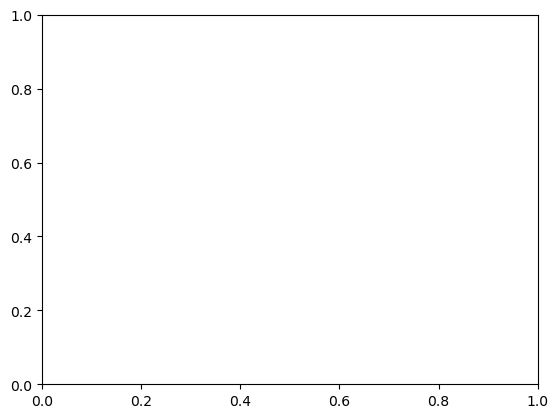

In [43]:
fig,ax = plt.subplots()
plt.plot(I_prem_R0_12, label='Infectious Prem')
plt.plot(I_statsnz_R0_12, '--', color='blue', label='Infectious StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax=plt.subplots()
plt.plot(I_prem_R0_17, label='Infectious Prem')
plt.plot(I_statsnz_R0_17, '--', color='blue', label='Infectious StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.7, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax=plt.subplots()
plt.plot(I_prem_R0_22, label='Infectious Prem')
plt.plot(I_statsnz_R0_22, '--', color='blue', label='Infectious StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=2.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax=plt.subplots()
plt.plot(I_prem_R0_27, label='Infectious Prem')
plt.plot(I_statsnz_R0_27, '--', color='blue', label='Infectious StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=2.7, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax=plt.subplots()
plt.plot(I_prem_R0_32, label='Infectious Prem')
plt.plot(I_statsnz_R0_32, '--', color='blue', label='Infectious StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=3.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax=plt.subplots()
plt.plot(I_prem_R0_17, label='R_0=1.7, Prem')
plt.plot(I_statsnz_R0_17, '--', color='blue', label='R_0=1.7, StatsNZ')
plt.plot(I_prem_R0_12, label='R_0=1.2, Prem')
plt.plot(I_statsnz_R0_12, '--', color='orange', label='R_0=1.2, StatsNZ')
plt.title(f'Infectious overtime during the pandemic, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

## Exposed

NameError: name 'E_prem_R0_12' is not defined

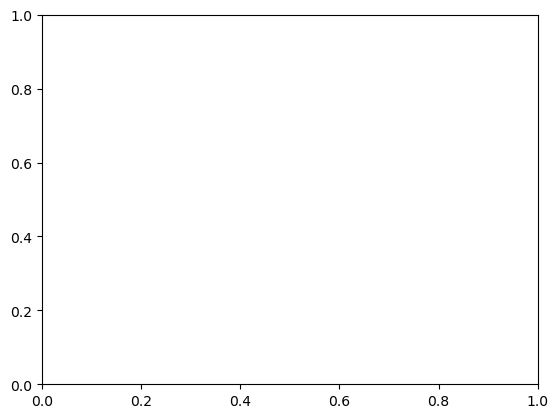

In [44]:
fig,ax = plt.subplots()
plt.plot(E_prem_R0_12,color='orange', label='Exposed Prem')
plt.plot(E_statsnz_R0_12, '--', color='orange', label='Exposed StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_R0_17,color='orange', label='Exposed Prem')
plt.plot(E_statsnz_R0_17, '--', color='orange', label='Exposed StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.7, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_R0_22,color='orange', label='Exposed Prem')
plt.plot(E_statsnz_R0_22, '--', color='orange', label='Exposed StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=2.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_R0_27,color='orange', label='Exposed Prem')
plt.plot(E_statsnz_R0_27, '--', color='orange', label='Exposed StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=2.7, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_R0_32,color='orange', label='Exposed Prem')
plt.plot(E_statsnz_R0_32, '--', color='orange', label='Exposed StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=3.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed population')
plt.legend()

fig,ax=plt.subplots()
plt.plot(E_prem_R0_17, label='R_0=1.7, Prem')
plt.plot(E_statsnz_R0_17, '--', color='blue', label='R_0=1.7, StatsNZ')
plt.plot(E_prem_R0_12, label='R_0=1.2, Prem')
plt.plot(E_statsnz_R0_12, '--', color='orange', label='R_0=1.2, StatsNZ')
plt.title(f'Exposed overtime during the pandemic, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

## Susceptability

NameError: name 'S_prem_R10_12' is not defined

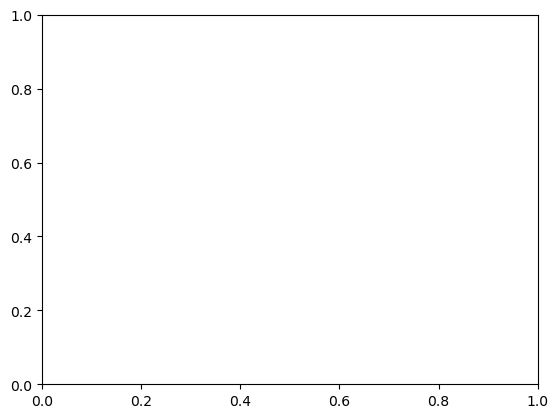

In [45]:
fig,ax = plt.subplots()
plt.plot(S_prem_R10_12, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_R0_12, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, {100*(1-S_statsnz_R0_12[-1]/S_statsnz_R0_12[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, {100*(1-S_prem_R10_12[-1]/S_prem_R10_12[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')


fig,ax = plt.subplots()
plt.plot(S_prem_R10_17, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_R0_17, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.7, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.7, {100*(1-S_statsnz_R0_17[-1]/S_statsnz_R0_17[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.7, {100*(1-S_prem_R10_17[-1]/S_prem_R10_17[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')


fig,ax = plt.subplots()
plt.plot(S_prem_R10_22, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_R0_22, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=2.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=2.2, {100*(1-S_statsnz_R0_22[-1]/S_statsnz_R0_22[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=2.2, {100*(1-S_prem_R10_22[-1]/S_prem_R10_22[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')


fig,ax = plt.subplots()
plt.plot(S_prem_R10_27, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_R0_27, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=2.7, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=2.7, {100*(1-S_statsnz_R0_27[-1]/S_statsnz_R0_27[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=2.7, {100*(1-S_prem_R10_27[-1]/S_prem_R10_27[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')


fig,ax = plt.subplots()
plt.plot(S_prem_R10_32, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_R0_32, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=3.2, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=3.2, {100*(1-S_statsnz_R0_32[-1]/S_statsnz_R0_32[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=3.2, {100*(1-S_prem_R10_32[-1]/S_prem_R10_32[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')


fig,ax=plt.subplots()
plt.plot(S_prem_R10_17, label='R_0=1.7, Prem')
plt.plot(S_statsnz_R0_17, '--', color='blue', label='R_0=1.7, StatsNZ')
plt.plot(S_prem_R10_12, label='R_0=1.2, Prem')
plt.plot(S_statsnz_R0_12, '--', color='orange', label='R_0=1.2, StatsNZ')
plt.title(f'Exposed overtime during the pandemic, μ={mu}, γ={gamma}')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

# Overall Results by age group

NameError: name 'S_statsnz_R0_12' is not defined

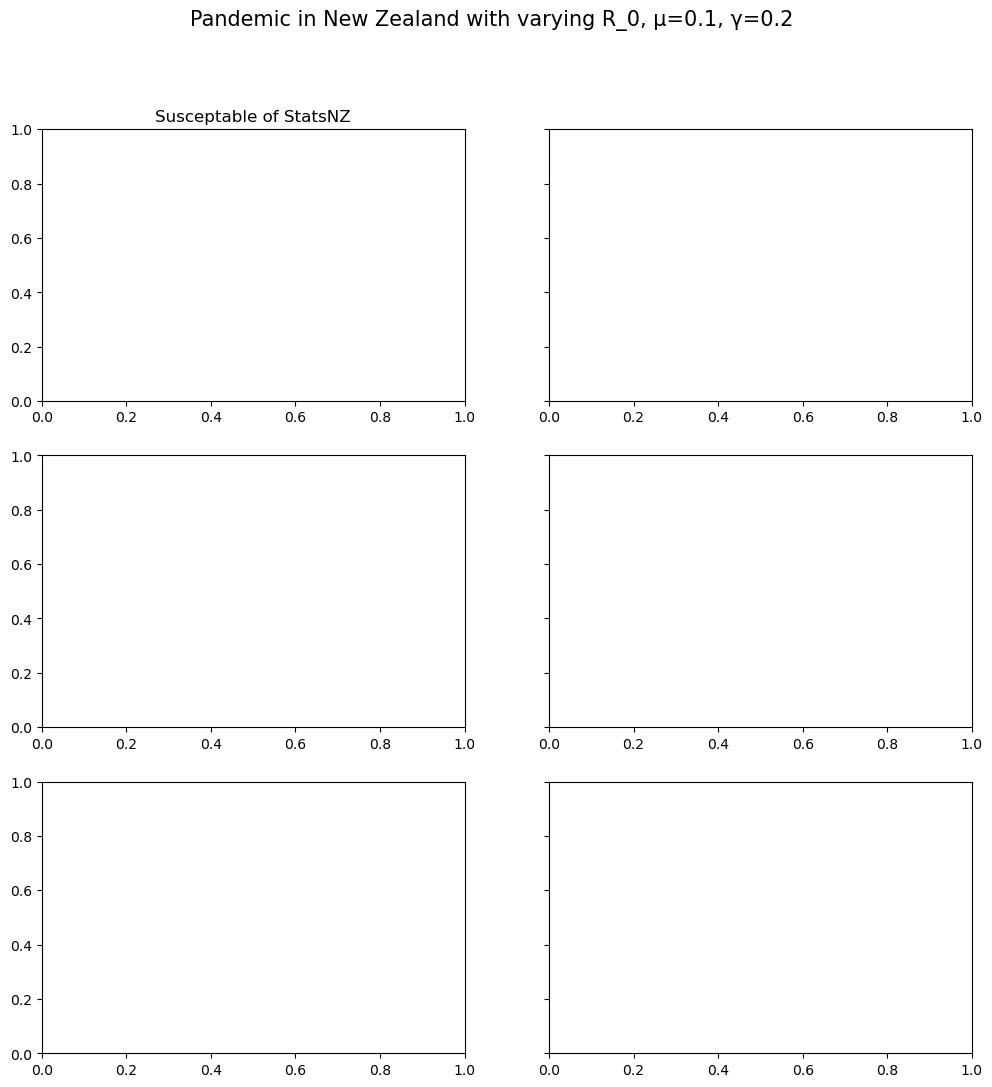

In [46]:
fig,ax = plt.subplots(3,2, figsize=(12,12),sharey='row')
fig.suptitle(f'Pandemic in New Zealand with varying R_0, μ={mu}, γ={gamma}', fontsize=15)


#Susceptability StatsNZ
ax[0][0].set_title(f'Susceptable of StatsNZ')
ax[0][0].plot(S_statsnz_R0_12, label='R_0=1.2')
ax[0][0].plot(S_statsnz_R0_17, label='R_0=1.7')
ax[0][0].plot(S_statsnz_R0_22, label='R_0=2.2')
ax[0][0].plot(S_statsnz_R0_27, label='R_0=2.7')
ax[0][0].plot(S_statsnz_R0_32, label='R_0=3.2')
#ax[0][0].set_xlabel('Days')
ax[0][0].set_ylabel('Susceptable Population')
#ax[0][0].set_xlim(0,300)

#Susceptability Prem et al
ax[0][1].set_title(f'Susceptable of Prem et al')
ax[0][1].plot(S_prem_R10_12)
ax[0][1].plot(S_prem_R10_17)
ax[0][1].plot(S_prem_R10_22)
ax[0][1].plot(S_prem_R10_27)
ax[0][1].plot(S_prem_R10_32)
#ax[0][1].set_xlabel('Days')
#ax[0][1].set_ylabel('Susceptable Population')
#ax[0][1].set_xlim(0,300)

#Exposed StatsNZ
ax[1][0].set_title(f'Exposed of StatsNZ')
ax[1][0].plot(E_statsnz_R0_12)
ax[1][0].plot(E_statsnz_R0_17)
ax[1][0].plot(E_statsnz_R0_22)
ax[1][0].plot(E_statsnz_R0_27)
ax[1][0].plot(E_statsnz_R0_32)
#ax[1][0].set_xlabel('Days')
ax[1][0].set_ylabel('Exposed Population')
#ax[1][0].set_xlim(0,300)

#Exposed Prem et al
ax[1][1].set_title(f'Exposed of Prem et al')
ax[1][1].plot(E_prem_R0_12)
ax[1][1].plot(E_prem_R0_17)
ax[1][1].plot(E_prem_R0_22)
ax[1][1].plot(E_prem_R0_27)
ax[1][1].plot(E_prem_R0_32)
#ax[1][1].set_xlabel('Days')
#ax[1][1].set_ylabel('Exposed Population')
#ax[1][1].set_xlim(0,300)

#Infectious StatsNZ
ax[2][0].set_title(f'Infected of StatsNZ')
ax[2][0].plot(I_statsnz_R0_12)
ax[2][0].plot(I_statsnz_R0_17)
ax[2][0].plot(I_statsnz_R0_22)
ax[2][0].plot(I_statsnz_R0_27)
ax[2][0].plot(I_statsnz_R0_32)
ax[2][0].set_xlabel('Days')
ax[2][0].set_ylabel('Infected Population')
#ax[2][0].set_xlim(0,300)

#Infectious Prem et al
ax[2][1].set_title(f'Infected of Prem et al')
ax[2][1].plot(I_prem_R0_12)
ax[2][1].plot(I_prem_R0_17)
ax[2][1].plot(I_prem_R0_22)
ax[2][1].plot(I_prem_R0_27)
ax[2][1].plot(I_prem_R0_32)
ax[2][1].set_xlabel('Days')
#ax[2][1].set_ylabel('Infected Population')
#ax[2][1].set_xlim(0,300)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center',  ncols=8)
fig.tight_layout()
plt.show()

# Plotting Pandemic (varying gamma and mu)

In [47]:
w, v = np.linalg.eig(household_matrix)
print(max(w))
household_matrix_norm = max(w).real #dominant eigenvalue #dominant eigen value


#matrix norm of household contact matrix
N = np.array(empiracal_tot[::-1]).reshape(8,1) #total population size
print(N)
R_0 = 1.2 #how many people each infected individual infects (average)
mu = 0.1# mu is inverse of infectious period, mu = 0.05, mu=0.2, mu=0.1
gamma = 0.2# one over the latent period of covid, gamma=0.3, gamma=0.1, gamma=0.2

ws, vs = np.linalg.eig(prem_10)
print(max(ws))
prem_10_norm = max(ws).real
#print(np.array(empiracal_tot[::-1]).reshape(8,1))

(2.1353463124290997+0j)
[[428745]
 [455655]
 [562881]
 [555534]
 [536559]
 [555225]
 [547290]
 [545802]]
(3.3144523733869784+0j)


## StatsNZ modelling

In [48]:
#Household Matrix modelling
#w, v = np.linalg.eig(household_matrix)
#household_matrix_norm = max(w).real #dominant eigenvalue
#print(household_matrix_norm)
beta = (R_0 * mu)/(household_matrix_norm)
print(beta)#Added a random 100
print(N,R_0,mu,gamma)

def pandemic_model(y, t, beta, gamma, mu):
    S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,I1,I2,I3,I4,I5,I6,I7,I8 = y
    S = np.array((S1,S2,S3,S4,S5,S6,S7,S8)).reshape(8,1)
    E = np.array((E1,E2,E3,E4,E5,E6,E7,E8)).reshape(8,1)
    I = np.array((I1,I2,I3,I4,I5,I6,I7,I8)).reshape(8,1)
    #print(E)
    #print(f'Value is {household_matrix @ I}')
    dSdt = -beta * (household_matrix @ I)*(S/N) #divide each popultion ngroup by their size NOT TOTAL SIZE
    dEdt = beta*(household_matrix @ I)*(S/N) - gamma*E
    #print(dEdt)
    dIdt = gamma*E - mu*I
    return dSdt[0,0], dSdt[1,0], dSdt[2,0],dSdt[3,0],dSdt[4,0],dSdt[5,0],dSdt[6,0],dSdt[7,0], dEdt[0,0], dEdt[1,0], dEdt[2,0],dEdt[3,0],dEdt[4,0],dEdt[5,0],dEdt[6,0],dEdt[7,0],dIdt[0,0], dIdt[1,0], dIdt[2,0],dIdt[3,0],dIdt[4,0],dIdt[5,0],dIdt[6,0],dIdt[7,0]

S0 = np.array(empiracal_tot[::-1])
E0 = np.array([100,1000,100,100,100,100,100,100])
I0 = np.array([0,0,0,0,0,0,0,0])
y0 = np.concatenate((S0, E0, I0))#.reshape(3,8)
t = np.linspace(0, 1000, 1000)

y = odeint(pandemic_model, y0, t, args=(beta, gamma,mu))
S1,S2,S3,S4,S5,S6,S7,S8,E1,E2,E3,E4,E5,E6,E7,E8,I1,I2,I3,I4,I5,I6,I7,I8 = y.T
#print(S2)

#plt.plot(S2) #All are giving the same output
#Number eighht plots youngest age group, smaller numbers = larger age groups
#plt.plot(I8+I7+I6+I5+I4+I3+I2+I1, label='Infectious')
#plt.plot(E8+E7+E6+E5+E4+E3+E2+E1, label='Exposed')
#plt.plot(S8+S7+S6+S5+S4+S3+S2+S1, label='Susceptable')
#plt.title(f'Stats NZ pandemic, R_0={R_0}, μ={mu}, γ={gamma}')
#plt.xlabel(f'Days')
#plt.ylabel(f'Population')
#plt.legend()
#print(max(I8+I7+I6+I5+I4+I3+I2+I1))

I_statsnz = I8+I7+I6+I5+I4+I3+I2+I1
E_statsnz = E8+E7+E6+E5+E4+E3+E2+E1
S_statsnz = S8+S7+S6+S5+S4+S3+S2+S1


#plt.plot(t, [:, 0], 'b', label='Susceptible')
#plt.plot(t, sol[:, 1], 'g', label='Exposed')
#plt.plot(t, sol[:, 2], 'r', label='Infectious')
#plt.plot(t, sol[:, 3], 'k', label='Recovered')
#plt.legend(loc='best')
#plt.xlabel('t')
#plt.title(f'Infection of {80-10*i}-{80-10*(i+1)} year olds by {10*j}-{10*(j+1)} year olds')
#plt.grid()
#plt.show()


0.056196973437761456
[[428745]
 [455655]
 [562881]
 [555534]
 [536559]
 [555225]
 [547290]
 [545802]] 1.2 0.1 0.2


In [49]:
I_statsnz_g03_m02 = I8+I7+I6+I5+I4+I3+I2+I1
E_statsnz_g03_m02 = E8+E7+E6+E5+E4+E3+E2+E1
S_statsnz_g03_m02 = S8+S7+S6+S5+S4+S3+S2+S1

In [50]:
I_statsnz_g02_m01
E_statsnz_g02_m01
S_statsnz_g02_m01

I_statsnz_g02_m005
E_statsnz_g02_m005
S_statsnz_g02_m005

I_statsnz_g02_m02
E_statsnz_g02_m02
S_statsnz_g02_m02

I_statsnz_g01_m01
E_statsnz_g01_m01
S_statsnz_g01_m01

I_statsnz_g01_m005
E_statsnz_g01_m005
S_statsnz_g01_m005

I_statsnz_g01_m02
E_statsnz_g01_m02
S_statsnz_g01_m02

I_statsnz_g03_m01
E_statsnz_g03_m01
S_statsnz_g03_m01

I_statsnz_g03_m005
E_statsnz_g03_m005
S_statsnz_g03_m005

I_statsnz_g03_m02
E_statsnz_g03_m02
S_statsnz_g03_m02

NameError: name 'I_statsnz_g02_m01' is not defined

NameError: name 'I_statsnz_g02_m005' is not defined

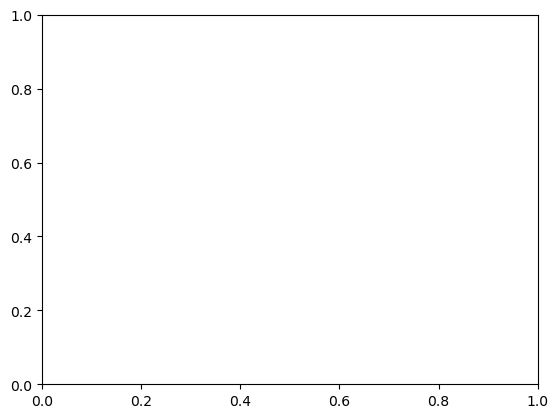

In [51]:
fig, ax = plt.subplots()

plt.plot(I_statsnz_g02_m005,label='μ=0.05, γ=0.2')
plt.plot(I_statsnz_g02_m01,label='μ=0.1, γ=0.2')
plt.plot(I_statsnz_g02_m02,label='μ=0.2, γ=0.2')
plt.plot(I_statsnz_g01_m005,label='μ=0.05, γ=0.1')
plt.plot(I_statsnz_g01_m01,label='μ=0.1, γ=0.1')
plt.plot(I_statsnz_g01_m02, label='μ=0.2, γ=0.1')
plt.plot(I_statsnz_g03_m005,label='μ=0.05, γ=0.3')
plt.plot(I_statsnz_g03_m01,label='μ=0.1, γ=0.3')
plt.plot(I_statsnz_g03_m02,label='μ=0.2, γ=0.3')

plt.title(f'Infectious overtime in StatsNZ pandemic with varying μ and γ')
plt.xlabel('Days')
plt.ylabel('Infectious Population')
plt.legend()

NameError: name 'E_statsnz_g02_m005' is not defined

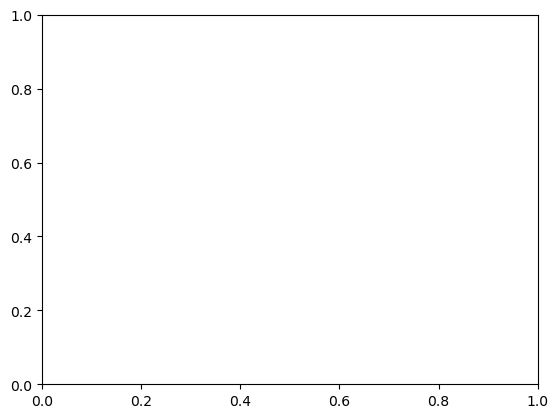

In [52]:
fig, ax = plt.subplots()

plt.plot(E_statsnz_g02_m005,label='μ=0.05, γ=0.2')
plt.plot(E_statsnz_g02_m01,label='μ=0.1, γ=0.2')
plt.plot(E_statsnz_g02_m02,label='μ=0.2, γ=0.2')
plt.plot(E_statsnz_g01_m005,label='μ=0.05, γ=0.1')
plt.plot(E_statsnz_g01_m01,label='μ=0.1, γ=0.1')
plt.plot(E_statsnz_g01_m02, label='μ=0.2, γ=0.1')
plt.plot(E_statsnz_g03_m005,label='μ=0.05, γ=0.3')
plt.plot(E_statsnz_g03_m01,label='μ=0.1, γ=0.3')
plt.plot(E_statsnz_g03_m02,label='μ=0.2, γ=0.3')

plt.title(f'Exposed overtime in StatsNZ pandemic with varying μ and γ')
plt.xlabel('Days')
plt.ylabel('Exposed Population')
plt.legend()

NameError: name 'S_statsnz_g02_m005' is not defined

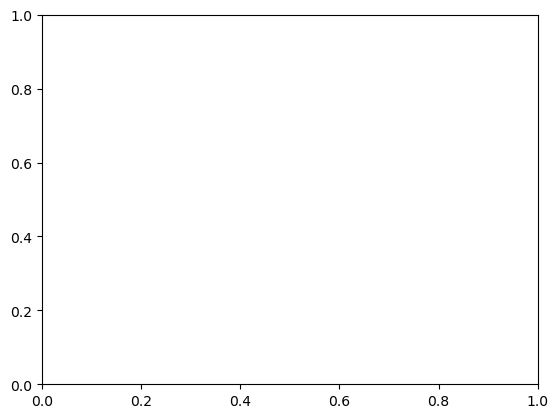

In [53]:
fig, ax = plt.subplots()

plt.plot(S_statsnz_g02_m005,label='μ=0.05, γ=0.2')
plt.plot(S_statsnz_g02_m01,label='μ=0.1, γ=0.2')
plt.plot(S_statsnz_g02_m02,label='μ=0.2, γ=0.2')
plt.plot(S_statsnz_g01_m005,label='μ=0.05, γ=0.1')
plt.plot(S_statsnz_g01_m01,label='μ=0.1, γ=0.1')
plt.plot(S_statsnz_g01_m02, label='μ=0.2, γ=0.1')
plt.plot(S_statsnz_g03_m005,label='μ=0.05, γ=0.3')
plt.plot(S_statsnz_g03_m01,label='μ=0.1, γ=0.3')
plt.plot(S_statsnz_g03_m02,label='μ=0.2, γ=0.3')

plt.title(f'Susceptable overtime in StatsNZ pandemic with varying μ and γ')
plt.xlabel('Days')
plt.ylabel('Susceptable Population')
plt.legend()

## Prem modelling

In [54]:
#Prem modelling
#ws, vs = np.linalg.eig(prem_10)
#prem_10_norm = np.linalg.norm(prem_10) #matrix norm of prem matrix
#prem_10_norm = max(ws).real
#print(prem_10_norm)

#N = np.array(empiracal_tot[::-1]).reshape(8,1) #total population size
#R_0 = 1.2 #how many people each infected individual infects (average)
#mu = 0.2 # mu is inverse of infectious period

beta = (R_0 * mu)/(prem_10_norm)
print(beta)
print(N,R_0,mu,gamma)
#gamma = 1/5.6 # one over the dormant period of covid 

def pandemic_model(y, t, beta, gamma, mu):
    S1p,S2p,S3p,S4p,S5p,S6p,S7p,S8p,E1p,E2p,E3p,E4p,E5p,E6p,E7p,E8p,I1p,I2p,I3p,I4p,I5p,I6p,I7p,I8p = y
    S = np.array((S1p,S2p,S3p,S4p,S5p,S6p,S7p,S8p)).reshape(8,1)
    E = np.array((E1p,E2p,E3p,E4p,E5p,E6p,E7p,E8p)).reshape(8,1)
    I = np.array((I1p,I2p,I3p,I4p,I5p,I6p,I7p,I8p)).reshape(8,1)
    #print(E)
    dSdt = -beta * (prem_10 @ I) * (S/N)
    #print(dSdt)
    dEdt = beta*(prem_10 @ I)*(S/N) - gamma*E
    #print(dEdt)
    dIdt = gamma*E - mu*I
    return dSdt[0,0], dSdt[1,0], dSdt[2,0],dSdt[3,0],dSdt[4,0],dSdt[5,0],dSdt[6,0],dSdt[7,0], dEdt[0,0], dEdt[1,0], dEdt[2,0],dEdt[3,0],dEdt[4,0],dEdt[5,0],dEdt[6,0],dEdt[7,0],dIdt[0,0], dIdt[1,0], dIdt[2,0],dIdt[3,0],dIdt[4,0],dIdt[5,0],dIdt[6,0],dIdt[7,0]


S0 = np.array(empiracal_tot[::-1])
E0 = np.array([100,1000,100,100,100,100,100,100])
I0 = np.array([0,0,0,0,0,0,0,0])
y0 = np.concatenate((S0, E0, I0))#.reshape(3,8)
t = np.linspace(0, 1000, 1000)

y = odeint(pandemic_model, y0, t, args=(beta, gamma,mu))
S1p,S2p,S3p,S4p,S5p,S6p,S7p,S8p,E1p,E2p,E3p,E4p,E5p,E6p,E7p,E8p,I1p,I2p,I3p,I4p,I5p,I6p,I7p,I8p = y.T
#print(S2)

#plt.plot(S2) #All are giving the same output
#Number eighht plots youngest age group, smaller numbers = larger age groups
#plt.plot(I8p+I7p+I6p+I5p+I4p+I3p+I2p+I1p, label='Infectious Prem')
#plt.plot(E8p+E7p+E6p+E5p+E4p+E3p+E2p+E1p, label='Exposed Prem')
#plt.plot(S8p+S7p+S6p+S5p+S4p+S3p+S2p+S1p, label='Susceptable Prem')
#plt.title(f'Prem Pandemic, R_0={R_0}, μ={mu}, γ={gamma}')
#plt.xlabel(f'Days')
#plt.ylabel(f'Population')
#plt.legend()
#print(max(I8p+I7p+I6p+I5p+I4p+I3p+I2p+I1p))

I_prem = I8p+I7p+I6p+I5p+I4p+I3p+I2p+I1p
E_prem = E8p+E7p+E6p+E5p+E4p+E3p+E2p+E1p
S_prem = S8p+S7p+S6p+S5p+S4p+S3p+S2p+S1p


#plt.plot(t, [:, 0], 'b', label='Susceptible')
#plt.plot(t, sol[:, 1], 'g', label='Exposed')
#plt.plot(t, sol[:, 2], 'r', label='Infectious')
#plt.plot(t, sol[:, 3], 'k', label='Recovered')
#plt.legend(loc='best')
#plt.xlabel('t')
#plt.title(f'Infection of {80-10*i}-{80-10*(i+1)} year olds by {10*j}-{10*(j+1)} year olds')
#plt.grid()
#plt.show()



0.03620507597681188
[[428745]
 [455655]
 [562881]
 [555534]
 [536559]
 [555225]
 [547290]
 [545802]] 1.2 0.1 0.2


In [55]:
I_prem_g03_m02 = I8p+I7p+I6p+I5p+I4p+I3p+I2p+I1p
E_prem_g03_m02 = E8p+E7p+E6p+E5p+E4p+E3p+E2p+E1p
S_prem_g03_m02 = S8p+S7p+S6p+S5p+S4p+S3p+S2p+S1p

In [56]:
I_prem_g02_m01
E_prem_g02_m01
S_prem_g02_m01

I_prem_g02_m005
E_prem_g02_m005
S_prem_g02_m005

I_prem_g02_m02
E_prem_g02_m02
S_prem_g02_m02

I_prem_g01_m01
E_prem_g01_m01
S_prem_g01_m01

I_prem_g01_m005
E_prem_g01_m005
S_prem_g01_m005

I_prem_g01_m02
E_prem_g01_m02
S_prem_g01_m02

I_prem_g03_m01
E_prem_g03_m01
S_prem_g03_m01

I_prem_g03_m005
E_prem_g03_m005
S_prem_g03_m005

I_prem_g03_m02
E_prem_g03_m02
S_prem_g03_m02

NameError: name 'I_prem_g02_m01' is not defined

NameError: name 'S_prem_g02_m005' is not defined

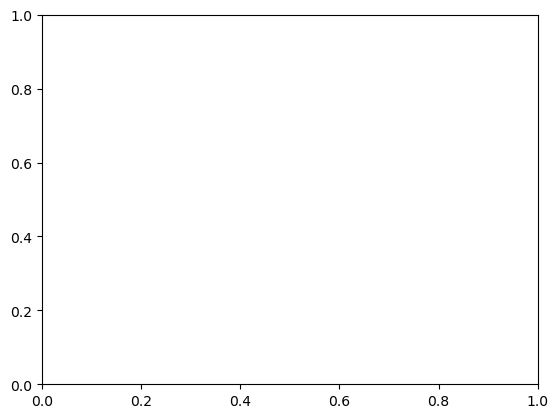

In [57]:
fig, ax = plt.subplots()

plt.plot(S_prem_g02_m005,label='μ=0.05, γ=0.2')
plt.plot(S_prem_g02_m01,label='μ=0.1, γ=0.2')
plt.plot(S_prem_g02_m02,label='μ=0.2, γ=0.2')
plt.plot(S_prem_g01_m005,label='μ=0.05, γ=0.1')
plt.plot(S_prem_g01_m01,label='μ=0.1, γ=0.1')
plt.plot(S_prem_g01_m02, label='μ=0.2, γ=0.1')
plt.plot(S_prem_g03_m005,label='μ=0.05, γ=0.3')
plt.plot(S_prem_g03_m01,label='μ=0.1, γ=0.3')
plt.plot(S_prem_g03_m02,label='μ=0.2, γ=0.3')

plt.title(f'Susceptable overtime in Prem pandemic with varying μ and γ')
plt.xlabel('Days')
plt.ylabel('Susceptable Population')
plt.legend()

NameError: name 'E_prem_g02_m005' is not defined

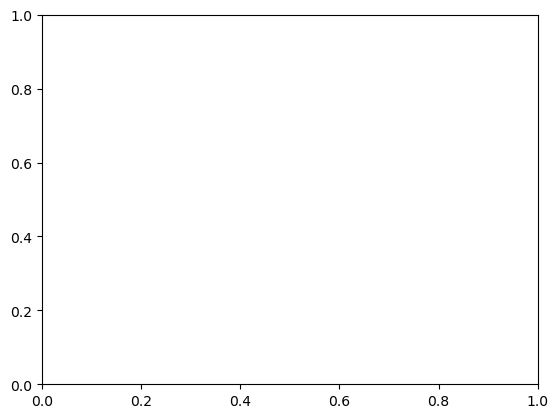

In [58]:
fig, ax = plt.subplots()

plt.plot(E_prem_g02_m005,label='μ=0.05, γ=0.2')
plt.plot(E_prem_g02_m01,label='μ=0.1, γ=0.2')
plt.plot(E_prem_g02_m02,label='μ=0.2, γ=0.2')
plt.plot(E_prem_g01_m005,label='μ=0.05, γ=0.1')
plt.plot(E_prem_g01_m01,label='μ=0.1, γ=0.1')
plt.plot(E_prem_g01_m02, label='μ=0.2, γ=0.1')
plt.plot(E_prem_g03_m005,label='μ=0.05, γ=0.3')
plt.plot(E_prem_g03_m01,label='μ=0.1, γ=0.3')
plt.plot(E_prem_g03_m02,label='μ=0.2, γ=0.3')

plt.title(f'Exposed overtime in Prem pandemic with varying μ and γ')
plt.xlabel('Days')
plt.ylabel('Exposed Population')
plt.legend()

NameError: name 'I_prem_g02_m005' is not defined

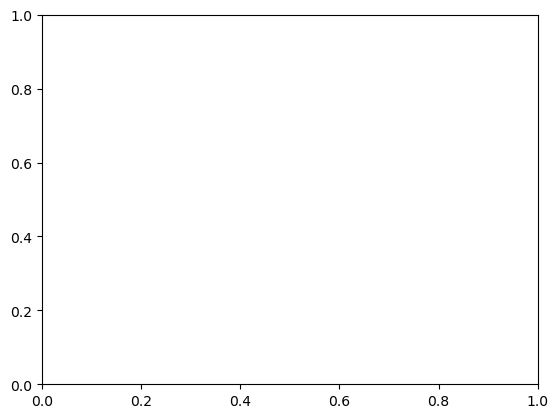

In [59]:
fig, ax = plt.subplots()

plt.plot(I_prem_g02_m005,label='μ=0.05, γ=0.2')
plt.plot(I_prem_g02_m01,label='μ=0.1, γ=0.2')
plt.plot(I_prem_g02_m02,label='μ=0.2, γ=0.2')
plt.plot(I_prem_g01_m005,label='μ=0.05, γ=0.1')
plt.plot(I_prem_g01_m01,label='μ=0.1, γ=0.1')
plt.plot(I_prem_g01_m02, label='μ=0.2, γ=0.1')
plt.plot(I_prem_g03_m005,label='μ=0.05, γ=0.3')
plt.plot(I_prem_g03_m01,label='μ=0.1, γ=0.3')
plt.plot(I_prem_g03_m02,label='μ=0.2, γ=0.3')

plt.title(f'Infectious overtime in Prem pandemic with varying μ and γ')
plt.xlabel('Days')
plt.ylabel('Infectious Population')
plt.legend()

# Plotting results

## Susceptability

NameError: name 'S_prem_g02_m01' is not defined

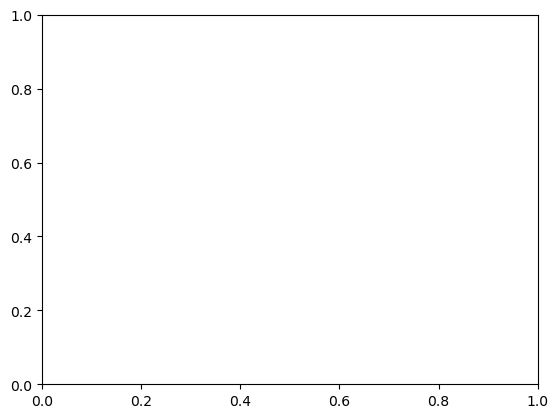

In [60]:
fig,ax = plt.subplots()
plt.plot(S_prem_g02_m01, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g02_m01, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.1, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.1, γ=0.2, {100*(1-S_statsnz_g02_m01[-1]/S_statsnz_g02_m01[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.1, γ=0.2, {100*(1-S_prem_g02_m01[-1]/S_prem_g02_m01[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

fig,ax = plt.subplots()
plt.plot(S_prem_g02_m005, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g02_m005, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.05, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.05, γ=0.2, {100*(1-S_statsnz_g02_m005[-1]/S_statsnz_g02_m005[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.05, γ=0.2, {100*(1-S_prem_g02_m005[-1]/S_prem_g02_m005[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

fig,ax = plt.subplots()
plt.plot(S_prem_g02_m02, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g02_m02, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.2, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.2, γ=0.2, {100*(1-S_statsnz_g02_m02[-1]/S_statsnz_g02_m02[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.2, γ=0.2, {100*(1-S_prem_g02_m02[-1]/S_prem_g02_m02[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

fig,ax = plt.subplots()
plt.plot(S_prem_g01_m01, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g01_m01, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.1, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.1, γ=0.1, {100*(1-S_statsnz_g01_m01[-1]/S_statsnz_g01_m01[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.1, γ=0.1, {100*(1-S_prem_g01_m01[-1]/S_prem_g01_m01[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

fig,ax = plt.subplots()
plt.plot(S_prem_g01_m005, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g01_m005, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.05, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.05, γ=0.1, {100*(1-S_statsnz_g01_m005[-1]/S_statsnz_g01_m005[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.05, γ=0.1, {100*(1-S_prem_g01_m005[-1]/S_prem_g01_m005[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

fig,ax = plt.subplots()
plt.plot(S_prem_g01_m02, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g01_m02, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.2, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.2, γ=0.1, {100*(1-S_statsnz_g01_m02[-1]/S_statsnz_g01_m02[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.2, γ=0.1, {100*(1-S_prem_g01_m02[-1]/S_prem_g01_m02[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

fig,ax = plt.subplots()
plt.plot(S_prem_g03_m01, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g03_m01, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.1, γ=0.3')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.1, γ=0.3, {100*(1-S_statsnz_g03_m01[-1]/S_statsnz_g03_m01[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.1, γ=0.3, {100*(1-S_prem_g03_m01[-1]/S_prem_g03_m01[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

fig,ax = plt.subplots()
plt.plot(S_prem_g03_m005, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g03_m005, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.3, γ=0.05')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.05, γ=0.3, {100*(1-S_statsnz_g03_m005[-1]/S_statsnz_g03_m005[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.05, γ=0.3, {100*(1-S_prem_g03_m005[-1]/S_prem_g03_m005[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

fig,ax = plt.subplots()
plt.plot(S_prem_g03_m02, color='green', label='Susceptable Prem')
plt.plot(S_statsnz_g03_m02, '--', color = 'green',label='Susceptable StatsNZ')
plt.title(f'Susceptable overtime during the pandemic, R_0=1.2, μ=0.3, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()
print(f'With R_0=1.2, μ=0.2, γ=0.3, {100*(1-S_statsnz_g03_m02[-1]/S_statsnz_g03_m02[0]):.2f}% of the population was infected by the pandemic based of statsNZ data')
print(f'With R_0=1.2, μ=0.2, γ=0.3, {100*(1-S_prem_g03_m02[-1]/S_prem_g03_m02[0]):.2f}% of the population was infected by the pandemic based of Prem et al data')

NameError: name 'S_prem_g01_m005' is not defined

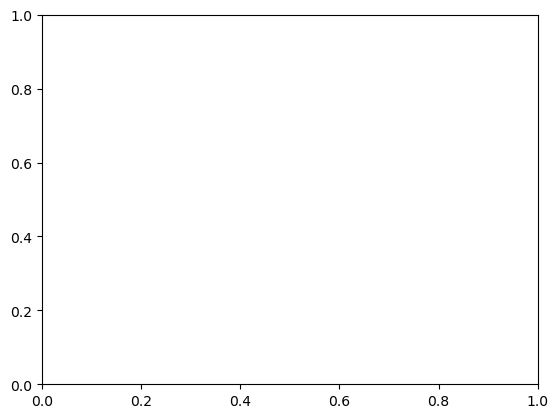

In [61]:
fig,ax = plt.subplots()
plt.plot(S_prem_g01_m005, color='green', label='μ=0.05, γ=0.1, Prem')
plt.plot(S_statsnz_g01_m005, '--', color = 'green',label='μ=0.05, γ=0.1, StatsNZ')

plt.plot(S_prem_g02_m01, color='blue', label='μ=0.1, γ=0.2, Prem')
plt.plot(S_statsnz_g02_m01, '--', color = 'blue',label='μ=0.1, γ=0.2, StatsNZ')

plt.plot(S_prem_g03_m005, color='orange', label='μ=0.05, γ=0.3, Prem')
plt.plot(S_statsnz_g03_m005, '--', color = 'orange',label='μ=0.05, γ=0.3, StatsNZ')

plt.title(f'Susceptable overtime during the pandemic, R_0=1.2')
plt.xlabel(f'Days')
plt.ylabel(f'Susceptable Population')
plt.legend()

## Exposed

NameError: name 'E_prem_g02_m01' is not defined

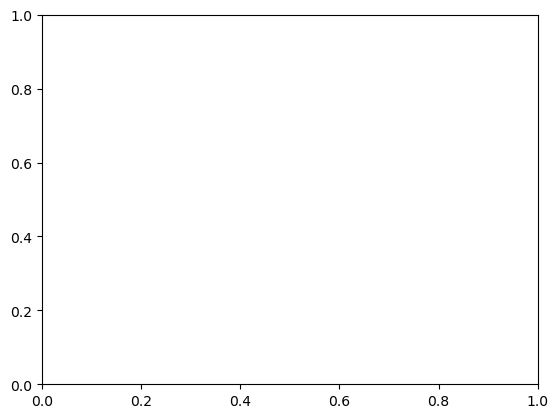

In [62]:
fig,ax = plt.subplots()
plt.plot(E_prem_g02_m01, color='orange', label='Prem')
plt.plot(E_statsnz_g02_m01, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.1, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_g02_m005, color='orange', label='Prem')
plt.plot(E_statsnz_g02_m005, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.05, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_g02_m02, color='orange', label='Prem')
plt.plot(E_statsnz_g02_m02, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.2, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_g01_m01, color='orange', label='Prem')
plt.plot(E_statsnz_g01_m01, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.1, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_g01_m005, color='orange', label='Prem')
plt.plot(E_statsnz_g01_m005, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.0.5, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_g01_m02,color='orange', label='Prem')
plt.plot(E_statsnz_g01_m02, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.2, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_g03_m01, color='orange', label='Prem')
plt.plot(E_statsnz_g03_m01, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.3, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_g03_m005, color='orange', label='Prem')
plt.plot(E_statsnz_g03_m005, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.3, γ=0.05')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(E_prem_g03_m02, color='orange', label='Prem')
plt.plot(E_statsnz_g03_m02, '--', color='orange',label='StatsNZ')
plt.title(f'Exposed overtime during the pandemic, R_0=1.2, μ=0.3, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

NameError: name 'E_prem_g01_m005' is not defined

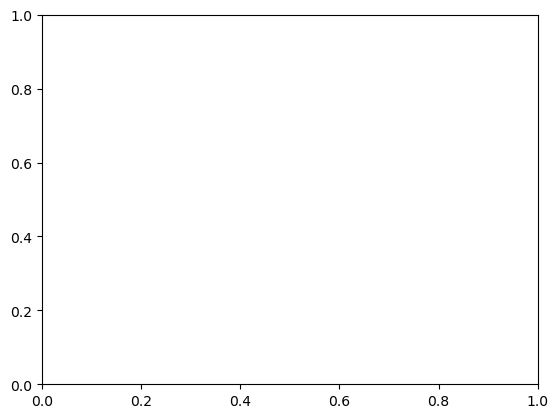

In [63]:
fig,ax = plt.subplots()
plt.plot(E_prem_g01_m005, color='green', label='μ=0.05, γ=0.1, Prem')
plt.plot(E_statsnz_g01_m005, '--', color = 'green',label='μ=0.05, γ=0.1, StatsNZ')

plt.plot(E_prem_g02_m01, color='blue', label='μ=0.1, γ=0.2, Prem')
plt.plot(E_statsnz_g02_m01, '--', color = 'blue',label='μ=0.1, γ=0.2, StatsNZ')

plt.plot(E_prem_g03_m005, color='orange', label='μ=0.05, γ=0.3, Prem')
plt.plot(E_statsnz_g03_m005, '--', color = 'orange',label='μ=0.05, γ=0.3, StatsNZ')

plt.title(f'Exposed overtime during the pandemic, R_0=1.2')
plt.xlabel(f'Days')
plt.ylabel(f'Exposed Population')
plt.legend()

## Infectious

NameError: name 'I_prem_g02_m01' is not defined

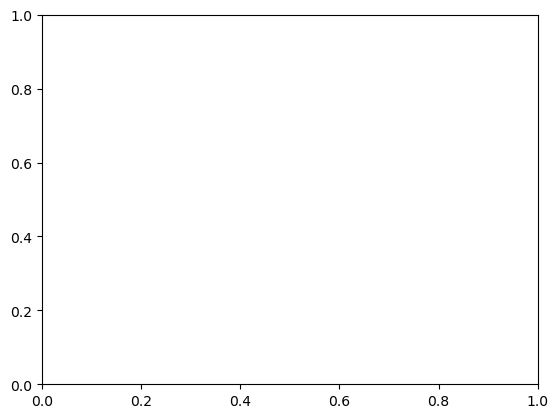

In [64]:
fig,ax = plt.subplots()
plt.plot(I_prem_g02_m01, color='blue', label='Prem')
plt.plot(I_statsnz_g02_m01, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.1, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(I_prem_g02_m005, color = 'blue', label='Prem')
plt.plot(I_statsnz_g02_m005, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.05, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(I_prem_g02_m02, color = 'blue', label='Prem')
plt.plot(I_statsnz_g02_m02, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.2, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(I_prem_g01_m01, color = 'blue', label='Prem')
plt.plot(I_statsnz_g01_m01, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.1, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(I_prem_g01_m005, color = 'blue', label='Prem')
plt.plot(I_statsnz_g01_m005, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.0.5, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(I_prem_g01_m02, color = 'blue', label='Prem')
plt.plot(I_statsnz_g01_m02, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.2, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(I_prem_g03_m01, color = 'blue', label='Prem')
plt.plot(I_statsnz_g03_m01, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.3, γ=0.1')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(I_prem_g03_m005, color = 'blue', label='Prem')
plt.plot(I_statsnz_g03_m005, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.3, γ=0.05')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

fig,ax = plt.subplots()
plt.plot(I_prem_g03_m02, color = 'blue', label='Prem')
plt.plot(I_statsnz_g03_m02, '--', color = 'blue',label='StatsNZ')
plt.title(f'Infectious overtime during the pandemic, R_0=1.2, μ=0.3, γ=0.2')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

NameError: name 'I_prem_g01_m005' is not defined

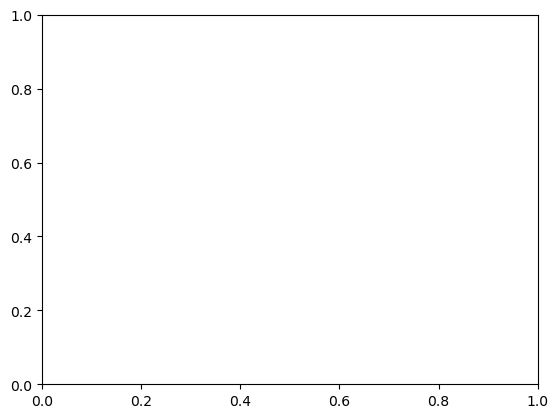

In [65]:
fig,ax = plt.subplots()
plt.plot(I_prem_g01_m005, color='green', label='μ=0.05, γ=0.1, Prem')
plt.plot(I_statsnz_g01_m005, '--', color = 'green',label='μ=0.05, γ=0.1, StatsNZ')

plt.plot(I_prem_g02_m01, color='blue', label='μ=0.1, γ=0.2, Prem')
plt.plot(I_statsnz_g02_m01, '--', color = 'blue',label='μ=0.1, γ=0.2, StatsNZ')

plt.plot(I_prem_g03_m005, color='orange', label='μ=0.05, γ=0.3, Prem')
plt.plot(I_statsnz_g03_m005, '--', color = 'orange',label='μ=0.05, γ=0.3, StatsNZ')

plt.title(f'Infectious overtime during the pandemic, R_0=1.2')
plt.xlabel(f'Days')
plt.ylabel(f'Infectious Population')
plt.legend()

# Plotting varying gamma and mu for all age groups

NameError: name 'S_statsnz_g02_m005' is not defined

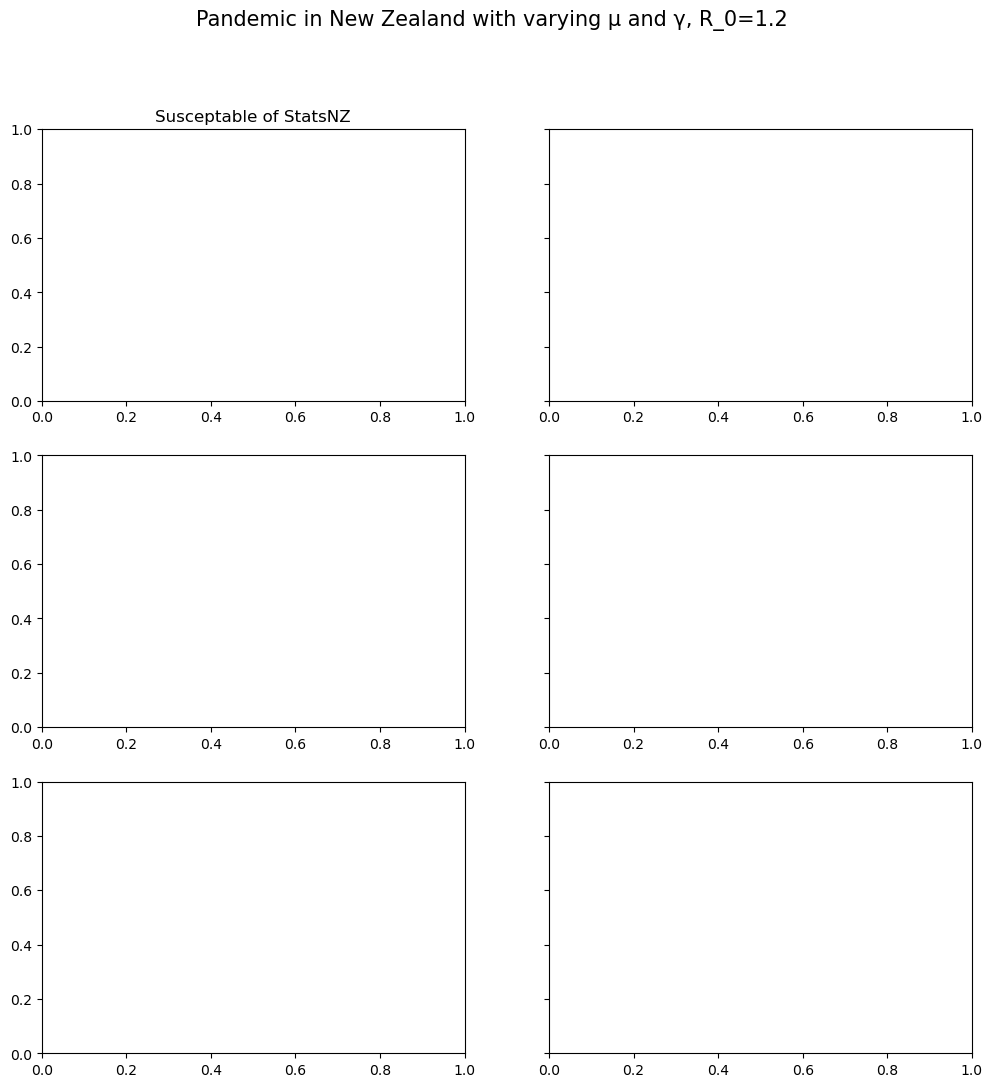

In [66]:
fig,ax = plt.subplots(3,2, figsize=(12,12),sharey='row')
fig.suptitle(f'Pandemic in New Zealand with varying μ and γ, R_0=1.2', fontsize=15)


#Susceptability StatsNZ
ax[0][0].set_title(f'Susceptable of StatsNZ')
ax[0][0].plot(S_statsnz_g02_m005)
ax[0][0].plot(S_statsnz_g02_m01)
ax[0][0].plot(S_statsnz_g02_m02)
ax[0][0].plot(S_statsnz_g01_m005)
ax[0][0].plot(S_statsnz_g01_m01)
ax[0][0].plot(S_statsnz_g01_m02)
ax[0][0].plot(S_statsnz_g03_m005)
ax[0][0].plot(S_statsnz_g03_m01)
ax[0][0].plot(S_statsnz_g03_m02)
#ax[0][0].set_xlabel('Days')
ax[0][0].set_ylabel('Susceptable Population')
#ax[0][0].set_xlim(0,300)

#Susceptability Prem et al
ax[0][1].set_title(f'Susceptable of Prem et al')
ax[0][1].plot(S_prem_g02_m005)
ax[0][1].plot(S_prem_g02_m01)
ax[0][1].plot(S_prem_g02_m02)
ax[0][1].plot(S_prem_g01_m005)
ax[0][1].plot(S_prem_g01_m01)
ax[0][1].plot(S_prem_g01_m02)
ax[0][1].plot(S_prem_g03_m005)
ax[0][1].plot(S_prem_g03_m01)
ax[0][1].plot(S_prem_g03_m02)
#ax[0][1].set_xlabel('Days')
#ax[0][1].set_ylabel('Susceptable Population')
#ax[0][1].set_xlim(0,300)

#Exposed StatsNZ
ax[1][0].set_title(f'Exposed of StatsNZ')
ax[1][0].plot(E_statsnz_g02_m005)
ax[1][0].plot(E_statsnz_g02_m01)
ax[1][0].plot(E_statsnz_g02_m02)
ax[1][0].plot(E_statsnz_g01_m005)
ax[1][0].plot(E_statsnz_g01_m01)
ax[1][0].plot(E_statsnz_g01_m02)
ax[1][0].plot(E_statsnz_g03_m005)
ax[1][0].plot(E_statsnz_g03_m01)
ax[1][0].plot(E_statsnz_g03_m02)
#ax[1][0].set_xlabel('Days')
ax[1][0].set_ylabel('Exposed Population')
#ax[1][0].set_xlim(0,300)

#Exposed Prem et al
ax[1][1].set_title(f'Exposed of Prem et al')
ax[1][1].plot(E_prem_g02_m005)
ax[1][1].plot(E_prem_g02_m01)
ax[1][1].plot(E_prem_g02_m02)
ax[1][1].plot(E_prem_g01_m005)
ax[1][1].plot(E_prem_g01_m01)
ax[1][1].plot(E_prem_g01_m02)
ax[1][1].plot(E_prem_g03_m005)
ax[1][1].plot(E_prem_g03_m01)
ax[1][1].plot(E_prem_g03_m02)
#ax[1][1].set_xlabel('Days')
#ax[1][1].set_ylabel('Exposed Population')
#ax[1][1].set_xlim(0,300)

#Infectious StatsNZ
ax[2][0].set_title(f'Infected of StatsNZ')
ax[2][0].plot(I_statsnz_g02_m005)
ax[2][0].plot(I_statsnz_g02_m01)
ax[2][0].plot(I_statsnz_g02_m02)
ax[2][0].plot(I_statsnz_g01_m005)
ax[2][0].plot(I_statsnz_g01_m01)
ax[2][0].plot(I_statsnz_g01_m02)
ax[2][0].plot(I_statsnz_g03_m005)
ax[2][0].plot(I_statsnz_g03_m01)
ax[2][0].plot(I_statsnz_g03_m02)
ax[2][0].set_xlabel('Days')
ax[2][0].set_ylabel('Infected Population')
#ax[2][0].set_xlim(0,300)

#Infectious Prem et al
ax[2][1].set_title(f'Infected of Prem et al')
ax[2][1].plot(I_prem_g02_m005,label='μ=0.05, γ=0.2')
ax[2][1].plot(I_prem_g02_m01,label='μ=0.1, γ=0.2')
ax[2][1].plot(I_prem_g02_m02,label='μ=0.2, γ=0.2')
ax[2][1].plot(I_prem_g01_m005,label='μ=0.05, γ=0.1')
ax[2][1].plot(I_prem_g01_m01,label='μ=0.1, γ=0.1')
ax[2][1].plot(I_prem_g01_m02, label='μ=0.2, γ=0.1')
ax[2][1].plot(I_prem_g03_m005,label='μ=0.05, γ=0.3')
ax[2][1].plot(I_prem_g03_m01,label='μ=0.1, γ=0.3')
ax[2][1].plot(I_prem_g03_m02,label='μ=0.2, γ=0.3')
ax[2][1].set_xlabel('Days')
#ax[2][1].set_ylabel('Infected Population')
#ax[2][1].set_xlim(0,300)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center',  ncols=5)
#fig.tight_layout()
plt.show()



## Breaking down specific mu and gamma values by age group

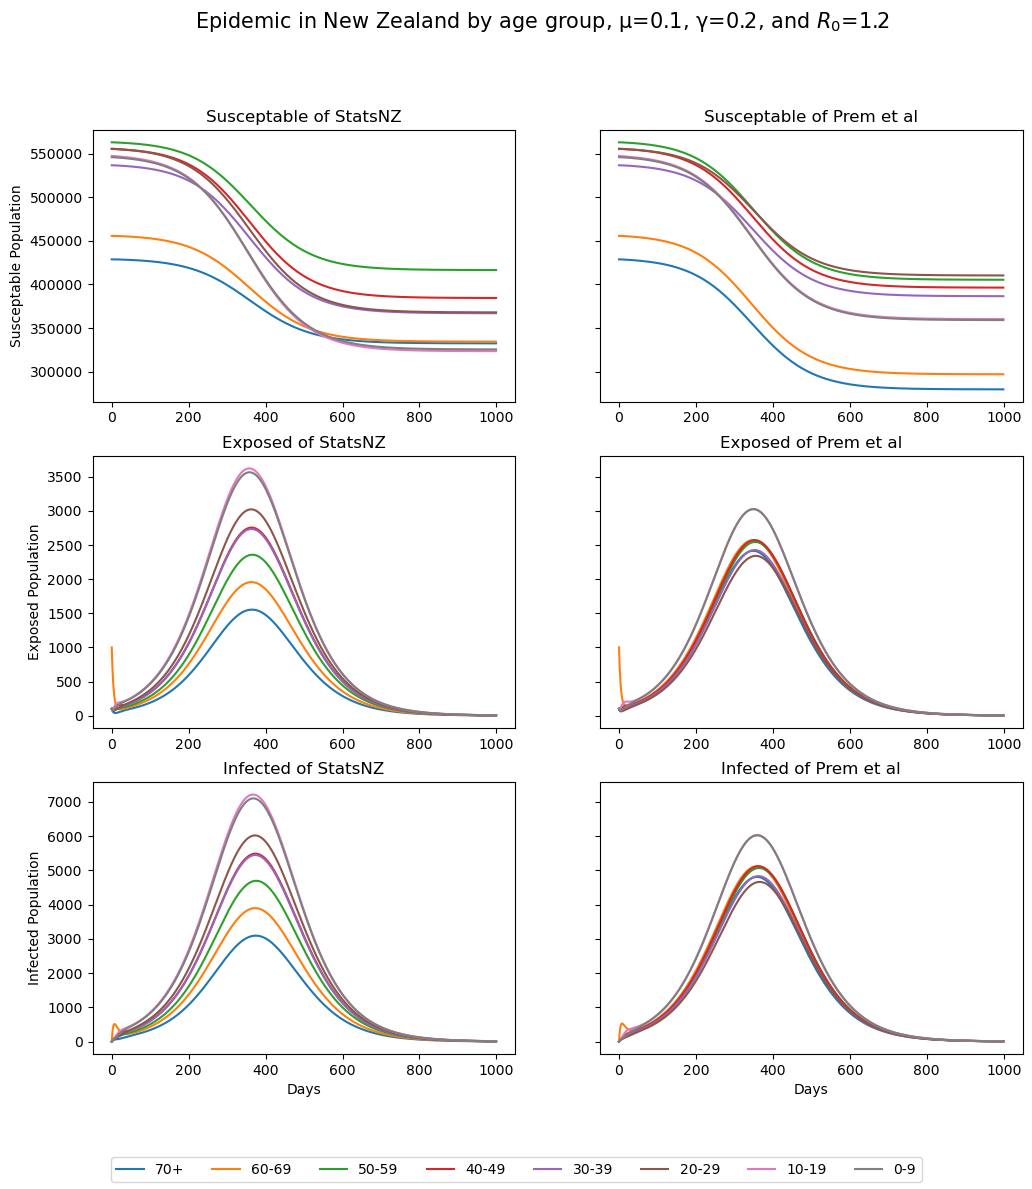

In [68]:
fig,ax = plt.subplots(3,2, figsize=(12,12),sharey='row')
fig.suptitle(f'Epidemic in New Zealand by age group, μ=0.1, γ=0.2, and $R_0$=1.2', fontsize=15)


#Susceptability StatsNZ
ax[0][0].set_title(f'Susceptable of StatsNZ')
ax[0][0].annotate('a', xy=(3,0))
ax[0][0].plot(S1)
ax[0][0].plot(S2)
ax[0][0].plot(S3)
ax[0][0].plot(S4)
ax[0][0].plot(S5)
ax[0][0].plot(S6)
ax[0][0].plot(S7)
ax[0][0].plot(S8)
#ax[0][0].set_xlabel('Days')
ax[0][0].set_ylabel('Susceptable Population')
#ax[0][0].set_xlim(0,300)

#Susceptability Prem et al
ax[0][1].set_title(f'Susceptable of Prem et al')
ax[0][1].plot(S1p)
ax[0][1].plot(S2p)
ax[0][1].plot(S3p)
ax[0][1].plot(S4p)
ax[0][1].plot(S5p)
ax[0][1].plot(S6p)
ax[0][1].plot(S7p)
ax[0][1].plot(S8p)
#ax[0][1].set_xlabel('Days')
#ax[0][1].set_ylabel('Susceptable Population')
#ax[0][1].set_xlim(0,300)

#Exposed StatsNZ
ax[1][0].set_title(f'Exposed of StatsNZ')
ax[1][0].plot(E1)
ax[1][0].plot(E2)
ax[1][0].plot(E3)
ax[1][0].plot(E4)
ax[1][0].plot(E5)
ax[1][0].plot(E6)
ax[1][0].plot(E7)
ax[1][0].plot(E8)
#ax[1][0].set_xlabel('Days')
ax[1][0].set_ylabel('Exposed Population')
#ax[1][0].set_xlim(0,300)

#Exposed Prem et al
ax[1][1].set_title(f'Exposed of Prem et al')
ax[1][1].plot(E1p)
ax[1][1].plot(E2p)
ax[1][1].plot(E3p)
ax[1][1].plot(E4p)
ax[1][1].plot(E5p)
ax[1][1].plot(E6p)
ax[1][1].plot(E7p)
ax[1][1].plot(E8p)
#ax[1][1].set_xlabel('Days')
#ax[1][1].set_ylabel('Exposed Population')
#ax[1][1].set_xlim(0,300)

#Infectious StatsNZ
ax[2][0].set_title(f'Infected of StatsNZ')
ax[2][0].plot(I1)
ax[2][0].plot(I2)
ax[2][0].plot(I3)
ax[2][0].plot(I4)
ax[2][0].plot(I5)
ax[2][0].plot(I6)
ax[2][0].plot(I7)
ax[2][0].plot(I8)
ax[2][0].set_xlabel('Days')
ax[2][0].set_ylabel('Infected Population')
#ax[2][0].set_xlim(0,300)

#Infectious Prem et al
ax[2][1].set_title(f'Infected of Prem et al')
ax[2][1].plot(I1p,label='70+')
ax[2][1].plot(I2p,label='60-69')
ax[2][1].plot(I3p,label='50-59')
ax[2][1].plot(I4p,label='40-49')
ax[2][1].plot(I5p,label='30-39')
ax[2][1].plot(I6p, label='20-29')
ax[2][1].plot(I7p,label='10-19')
ax[2][1].plot(I8p,label='0-9')
ax[2][1].set_xlabel('Days')
#ax[2][1].set_ylabel('Infected Population')
#ax[2][1].set_xlim(0,300)

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
fig.legend(lines, labels, loc='lower center',  ncols=8)
#fig.tight_layout()
plt.show()

